In [94]:
import pandas as pd
import numpy as np
import sys
import os
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

# Import the function
sys.path.append(os.path.abspath('../src/data'))
from extract_for_model_new import extract_time_series
from extract_for_model_new import scale_time_series

In [ ]:
# Import required paths to input files
# Change the file to import if needed
from data_links import soft_pub_IS as input_IS
from data_links import soft_pub_BS as input_BS

In [160]:
input_path = input_IS
features = [ 'IQ_EBIT','IQ_TOTAL_OPER_EXPEN','IQ_OPER_INC','IQ_TOTAL_REV']
ids        = []
year_min   = 2014
steps      = 0
unitshift = 0
train_df, test_df = extract_time_series(input_path = input_path,
                                   features = features,
                                    year_min = year_min,
                                      steps = steps,
                                unitshift = 0
                                 
                                
                                )

dataset = pd.concat([train_df,test_df])
print(dataset.head())

Size BEFORE dropping NA: (2216, 7)
Size AFTER dropping NA: (2173, 7)
TEST  set size: (510, 7)
TRAIN set size: (1663, 7)
TEST is 23% of all available datapoints
        company    year quarter   IQ_EBIT  IQ_TOTAL_OPER_EXPEN  IQ_OPER_INC  \
6     IQ1004737  2014.0      Q4  3.888034            29.596280     3.888034   
7     IQ1004737  2015.0      Q4  3.053093            24.853767     3.053093   
8     IQ1004737  2016.0      Q4  3.291391            30.007893     3.291391   
9     IQ1004737  2017.0      Q4  3.089815            37.900433     3.089815   
16  IQ100546355  2016.0      Q4  1.201000            10.910500     1.201000   

    IQ_TOTAL_REV  
6      33.484314  
7      27.906860  
8      33.299282  
9      40.990250  
16     12.111500  


In [161]:
input_path = input_BS
features = [ 'IQ_AR','IQ_RE','IQ_TOTAL_ASSETS']
ids        = []
year_min   = 2014
steps      = 0
unitshift = 0
train_df, test_df = extract_time_series(input_path = input_path,
                                   features = features,
                                    year_min = year_min,
                                        steps=steps,
                                        unitshift=unitshift
                                      
                                
                                       )
                                
            




dataset1 = pd.concat([train_df,test_df])
print(dataset1.head())

Size BEFORE dropping NA: (2205, 6)
Size AFTER dropping NA: (2027, 6)
TEST  set size: (481, 6)
TRAIN set size: (1546, 6)
TEST is 24% of all available datapoints
        company    year quarter      IQ_AR      IQ_RE  IQ_TOTAL_ASSETS
15  IQ100546355  2014.0      Q4   0.177000   1.576000        25.146000
17  IQ100546355  2016.0      Q4   8.918000  16.089000        84.113000
18  IQ100546355  2017.0      Q4   8.575000   4.963000        85.132000
21  IQ100842126  2014.0      Q4   8.536434  -8.726720        23.985275
22  IQ100842126  2015.0      Q4  14.441339  -7.972968        41.938730


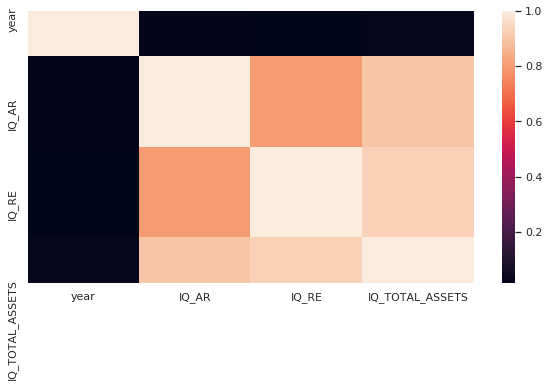

In [162]:
sns.set_context("notebook")
#sns.set_style("darkgrid")
plt.figure(figsize=(10,5))
sns.heatmap(dataset1.corr())

In [163]:
dataset_merge = pd.merge(dataset,dataset1 , on= ['company','year'])

In [164]:
print(dataset_merge.head())

       company    year quarter_x   IQ_EBIT  IQ_TOTAL_OPER_EXPEN  IQ_OPER_INC  \
0    IQ1004737  2014.0        Q4  3.888034            29.596280     3.888034   
1  IQ100546355  2016.0        Q4  1.201000            10.910500     1.201000   
2  IQ100546355  2017.0        Q2 -0.725500            15.521500    -0.725500   
3  IQ100842126  2014.0        Q4  0.288576            10.953217     0.288576   
4  IQ100842126  2015.0        Q4  1.942426            18.827354     1.942426   

   IQ_TOTAL_REV quarter_y      IQ_AR      IQ_RE  IQ_TOTAL_ASSETS  
0     33.484314        Q4  57.847088   6.690141       150.617280  
1     12.111500        Q4   8.918000  16.089000        84.113000  
2     14.796000        Q4   8.575000   4.963000        85.132000  
3     11.241793        Q4   8.536434  -8.726720        23.985275  
4     20.769781        Q4  14.441339  -7.972968        41.938730  


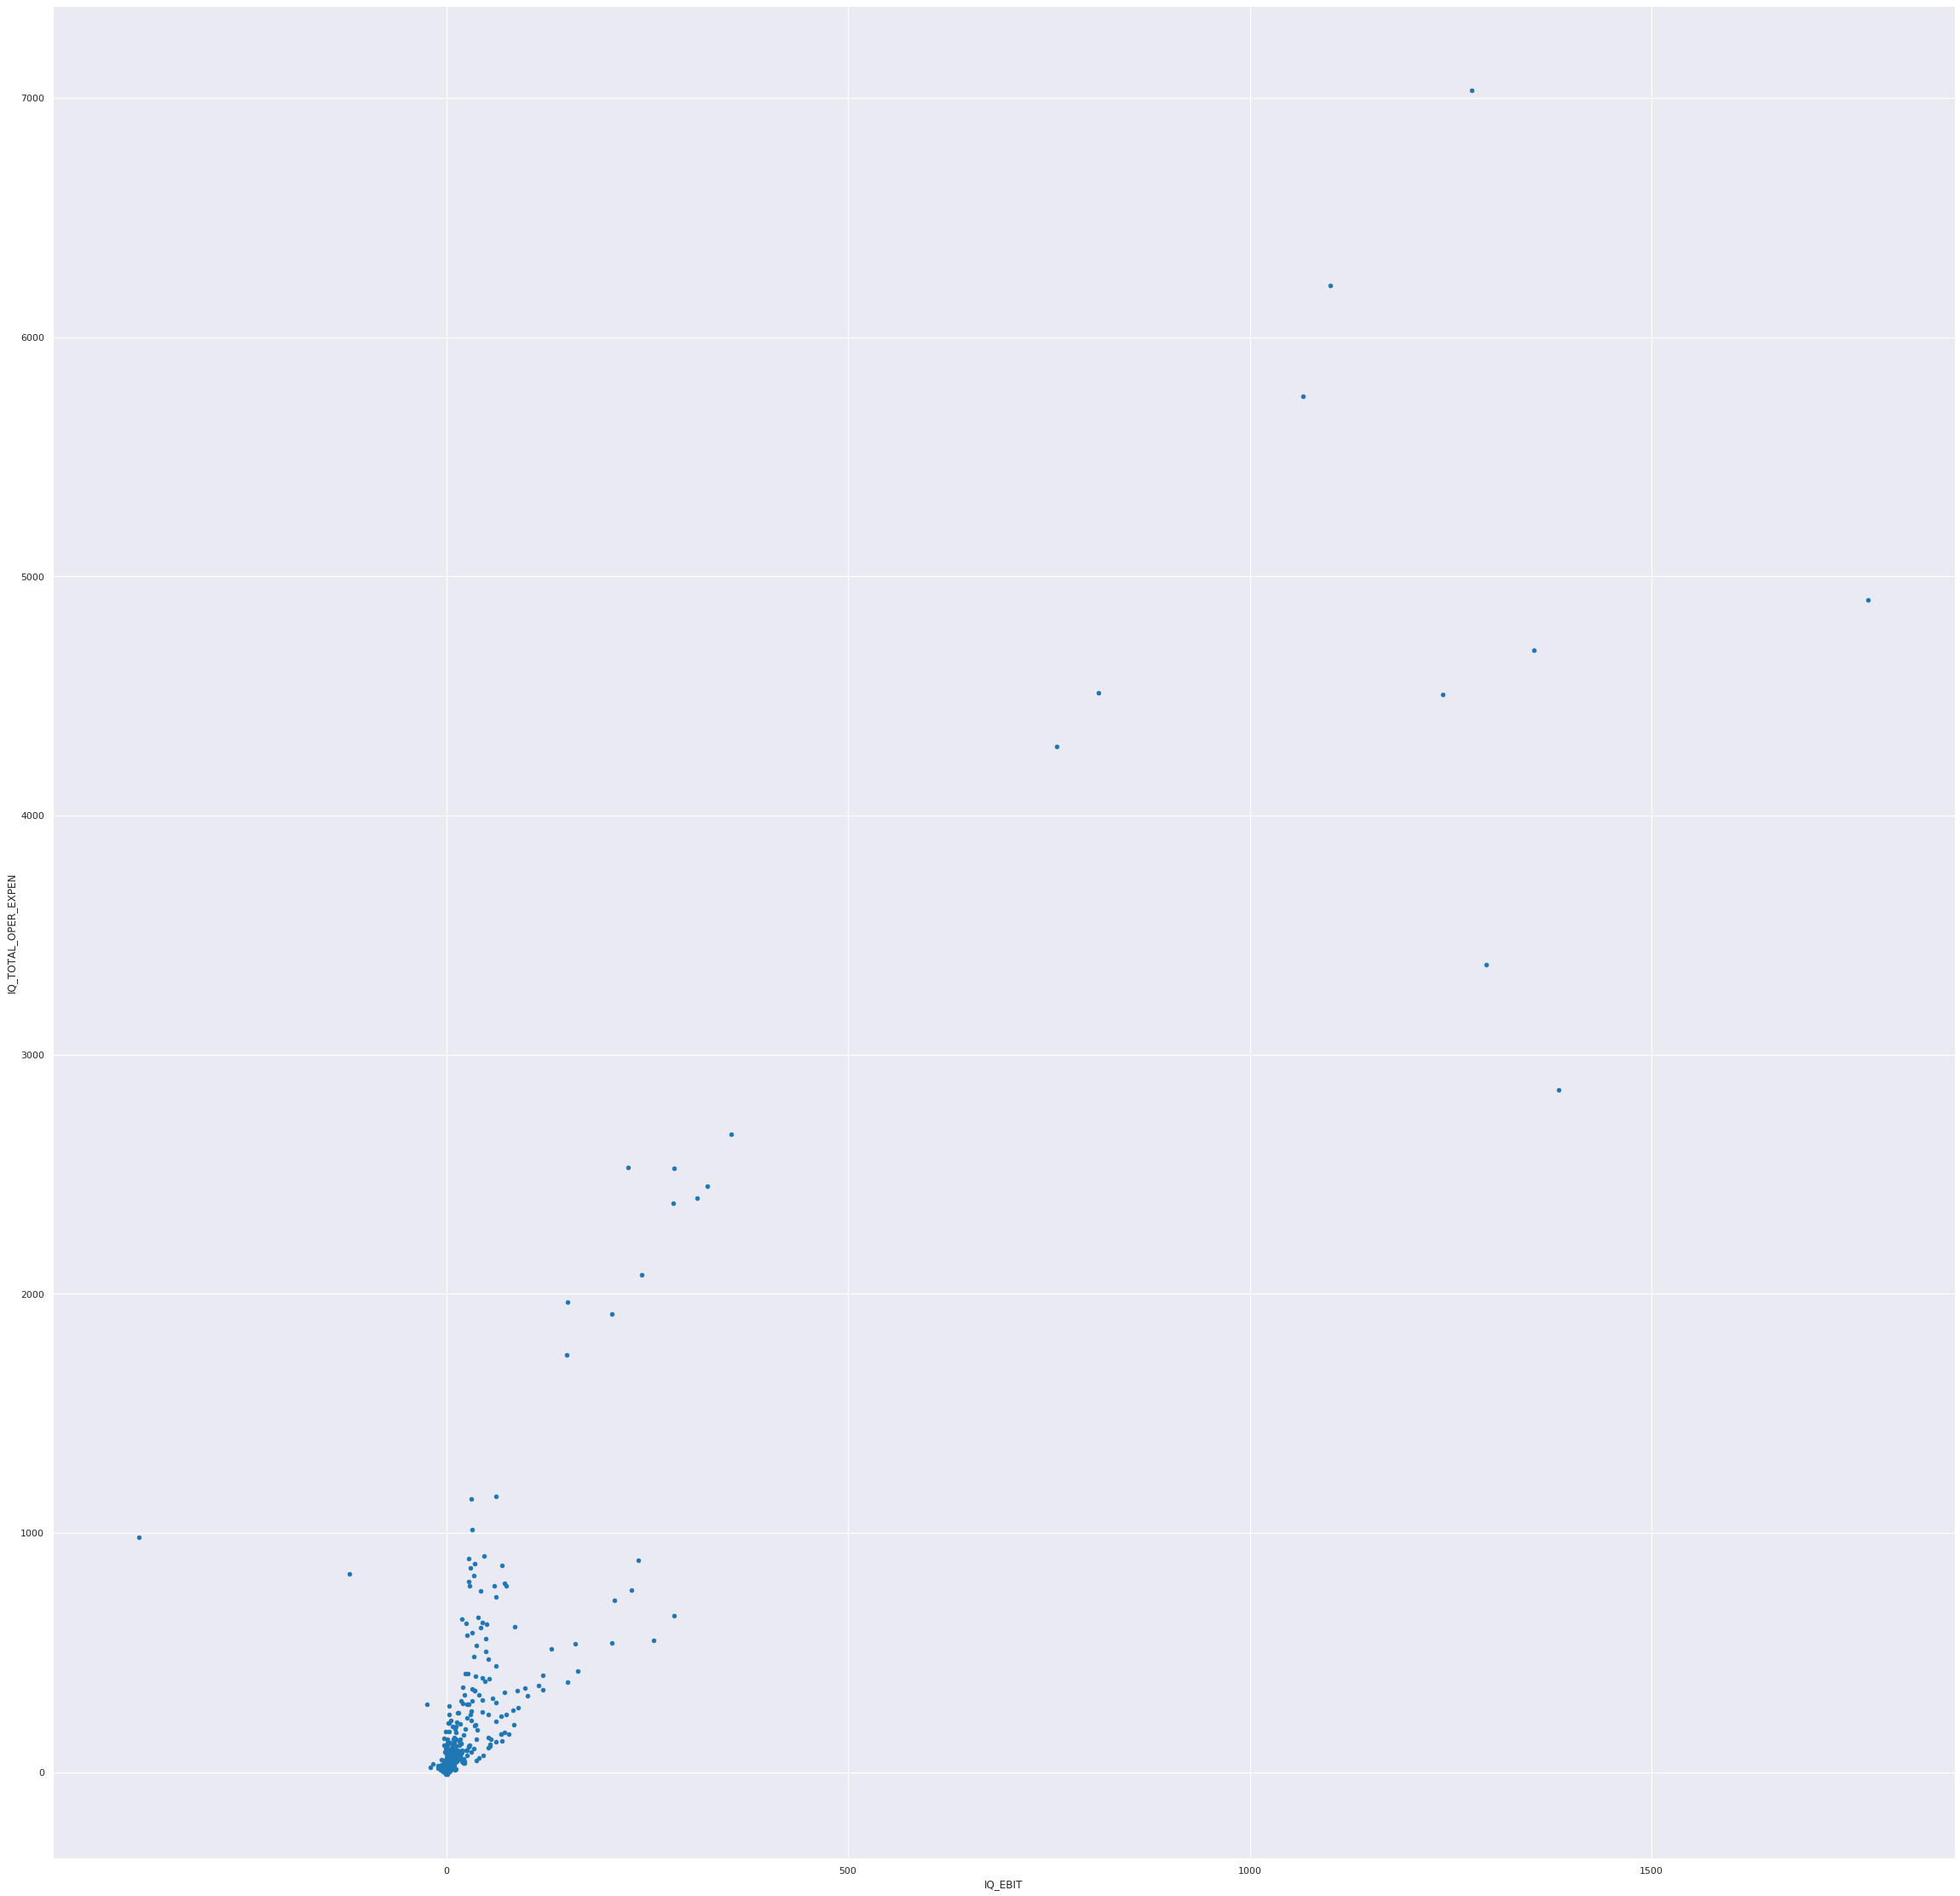

In [165]:
dataset_merge.plot(kind='scatter',x='IQ_EBIT', y='IQ_TOTAL_OPER_EXPEN')

In [166]:
scaler = StandardScaler()

In [167]:
dataset_scale = dataset_merge.copy()
col_names = ['IQ_OPER_INC', 'IQ_EBIT','IQ_TOTAL_OPER_EXPEN','IQ_TOTAL_REV','IQ_AR','IQ_RE','IQ_TOTAL_ASSETS']
features = scaled_features[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
dataset_scale[col_names] = features
print(scaled_features)

          company    year    IQ_EBIT  IQ_TOTAL_OPER_EXPEN  IQ_TOTAL_REV  \
0       IQ1004737  2014.0  -0.082657            -0.105469     -0.102901   
1     IQ100546355  2016.0  -0.112290            -0.152696     -0.147580   
2     IQ100546355  2017.0  -0.133536            -0.141042     -0.141969   
3     IQ100842126  2014.0  -0.122353            -0.152588     -0.149398   
4     IQ100842126  2015.0  -0.104113            -0.132686     -0.129481   
...           ...     ...        ...                  ...           ...   
2018     IQ972190  2018.0  13.950577            17.595944     17.198073   
2019   IQ98129600  2018.0  -0.129989            -0.174787     -0.169207   
2020   IQ98244713  2018.0  -0.125191            -0.168308     -0.162939   
2021    IQ9845893  2018.0  -0.117604            -0.167674     -0.160976   
2022    IQ9898268  2018.0  -0.112756            -0.163213     -0.156367   

      IQ_OPER_INC      IQ_AR     IQ_RE  IQ_TOTAL_ASSETS  centroids  
0       -0.082657  -0.043919 -

In [168]:
dataset_scale=dataset_scale.drop(['quarter_x','quarter_y'],axis =1)

In [169]:
dataset_scale.head()

,company,year,IQ_EBIT,IQ_TOTAL_OPER_EXPEN,IQ_OPER_INC,IQ_TOTAL_REV,IQ_AR,IQ_RE,IQ_TOTAL_ASSETS
0,IQ1004737,2014.0,-0.082657,-0.105469,-0.082657,-0.102901,-0.043919,-0.091575,-0.101657
1,IQ100546355,2016.0,-0.112290,-0.152696,-0.112290,-0.147580,-0.165432,-0.082681,-0.130756
2,IQ100546355,2017.0,-0.133536,-0.141042,-0.133536,-0.141969,-0.166284,-0.093209,-0.130310
3,IQ100842126,2014.0,-0.122353,-0.152588,-0.122353,-0.149398,-0.166380,-0.106163,-0.157064
4,IQ100842126,2015.0,-0.104113,-0.132686,-0.104113,-0.129481,-0.151715,-0.105450,-0.149209


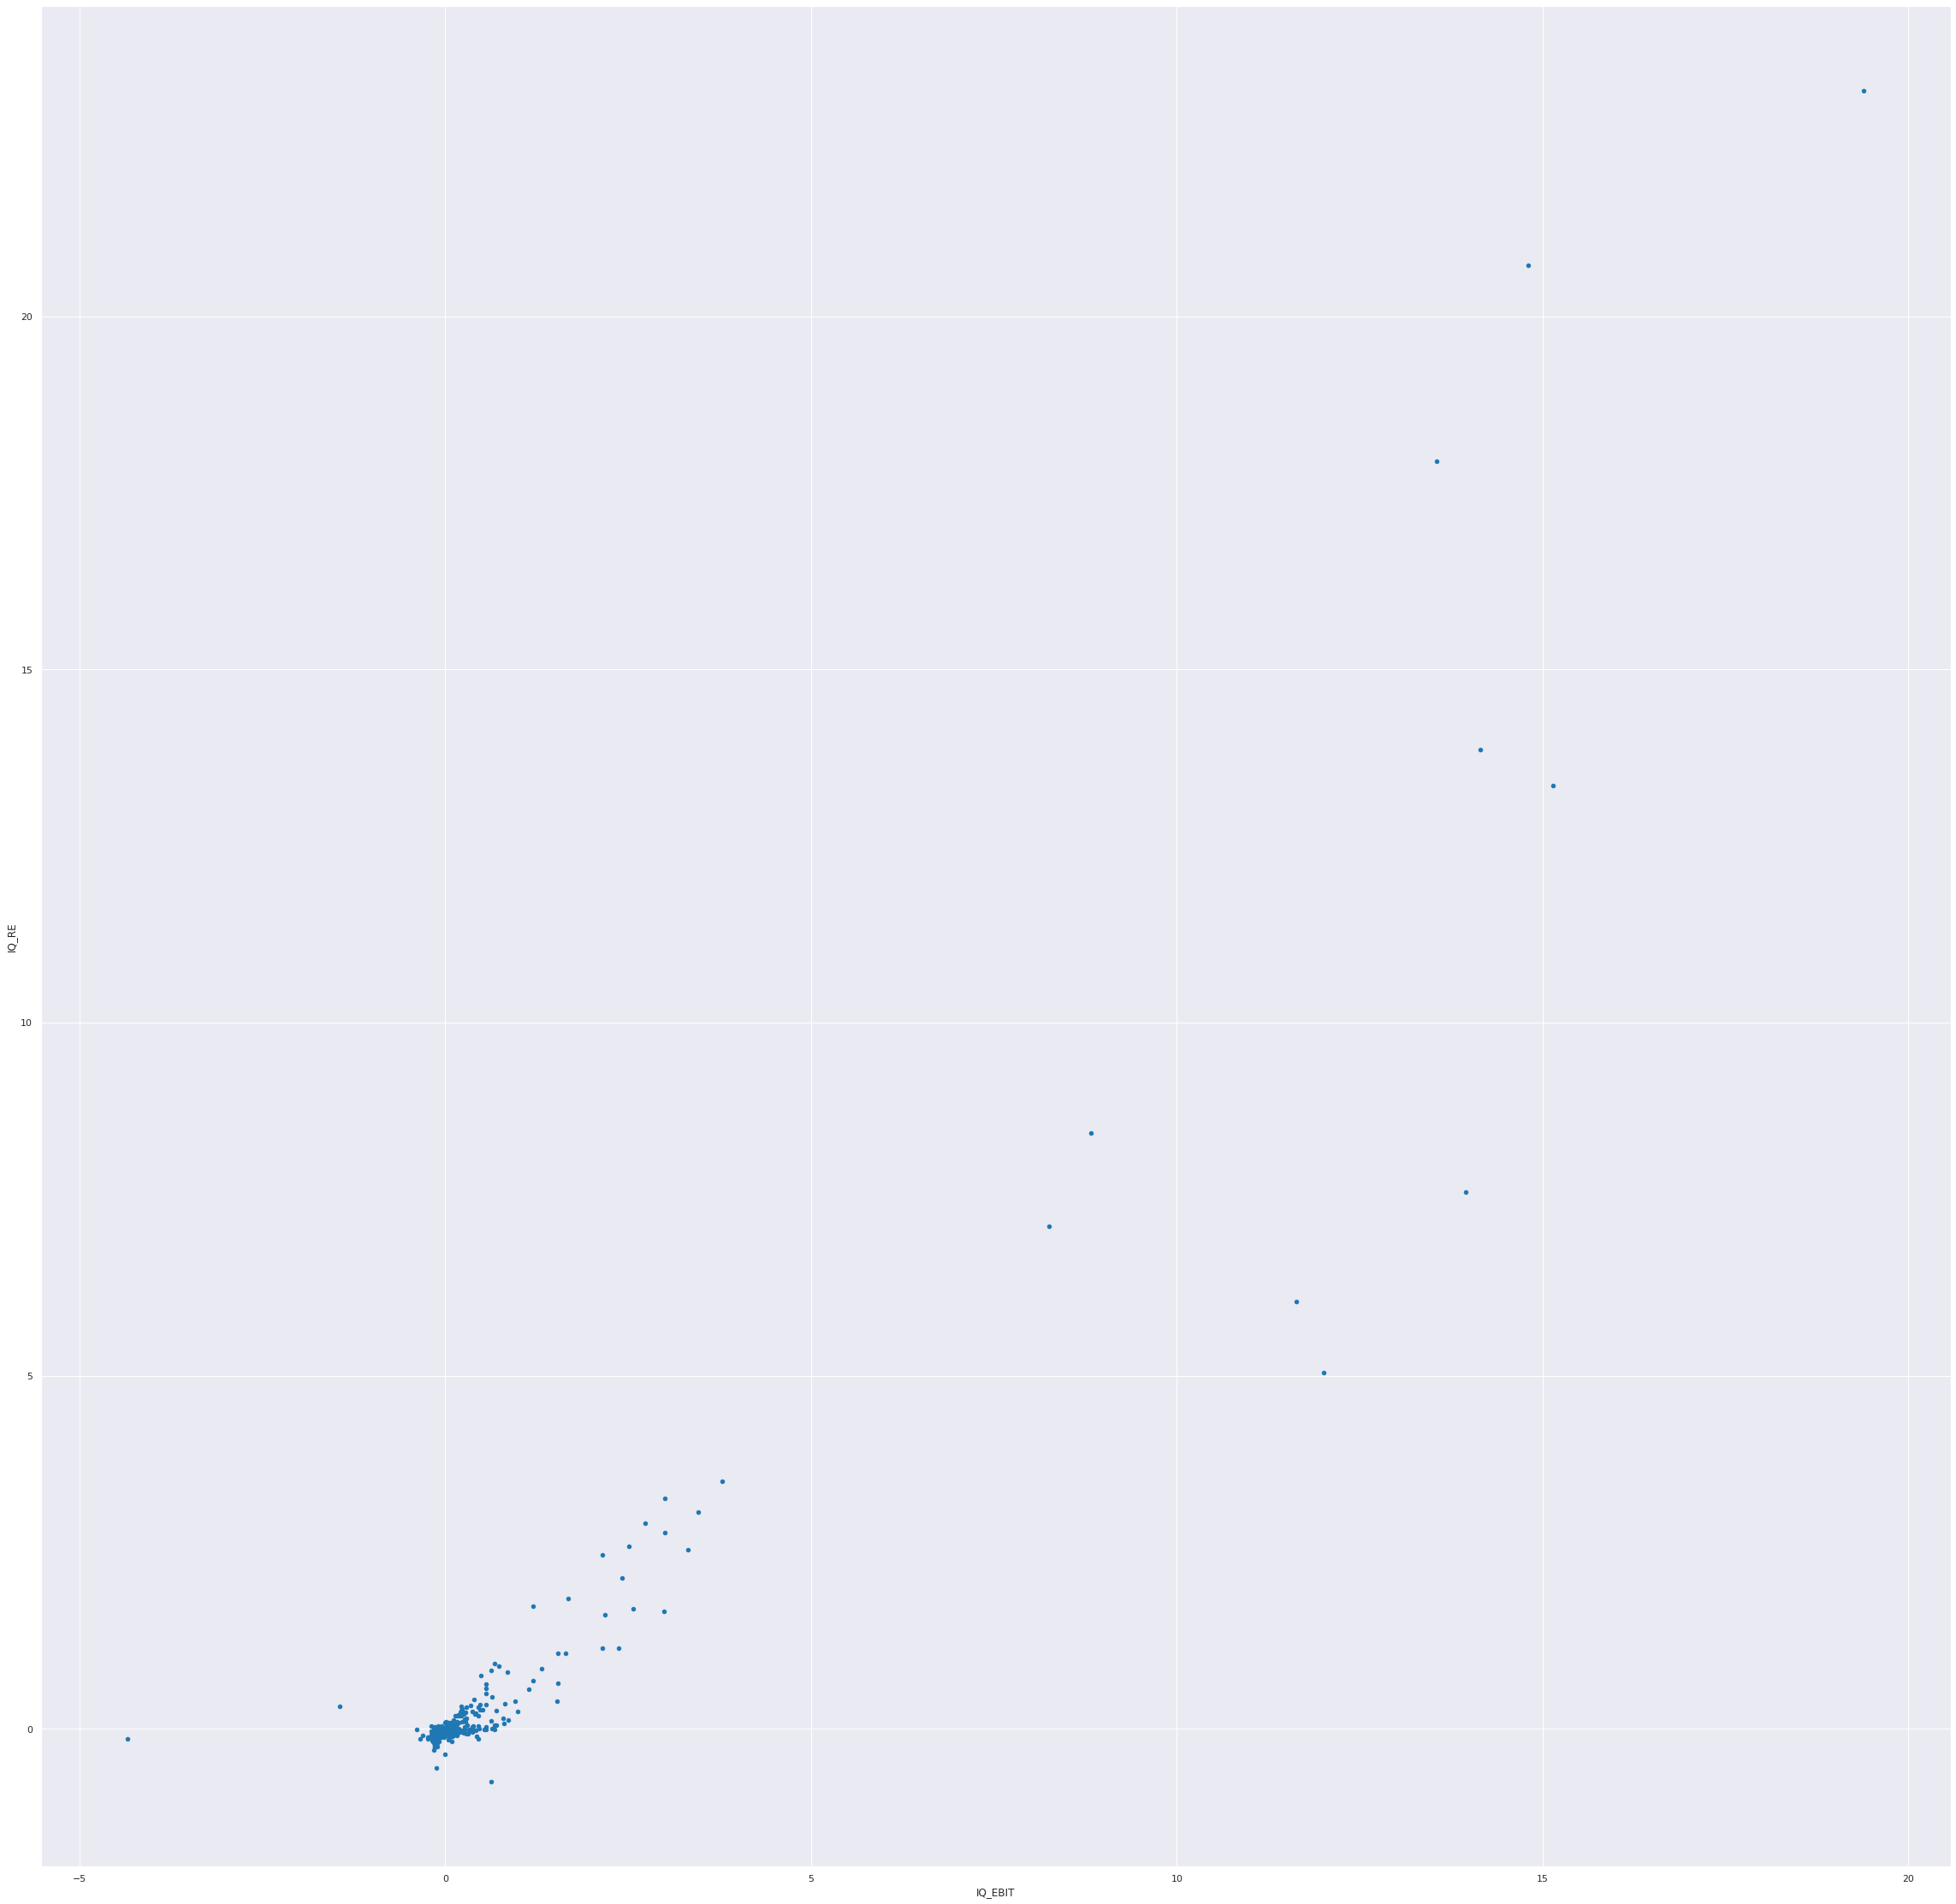

In [170]:
dataset_scale.plot(kind='scatter',x='IQ_EBIT',y='IQ_RE')

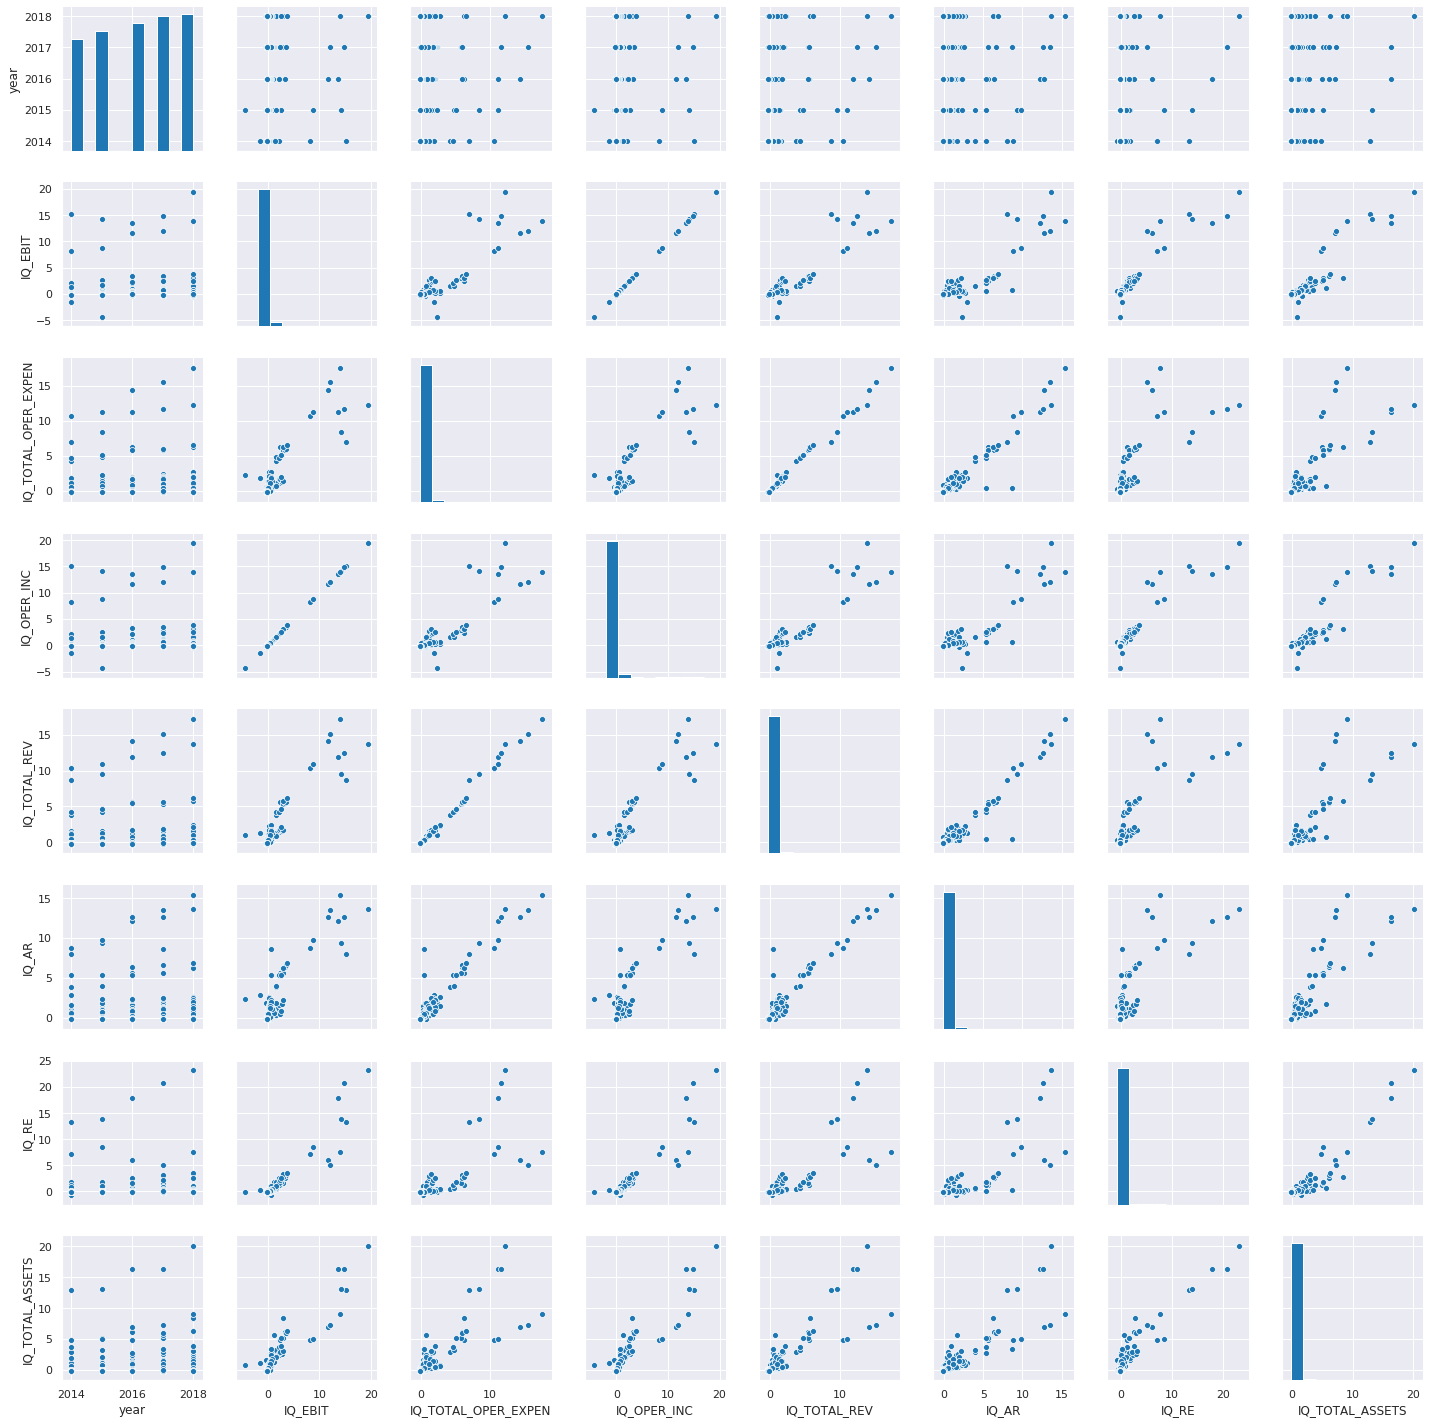

In [171]:

sns.set_context("notebook")
sns.pairplot(dataset_scale)

In [172]:
inertia = [] # List of the inertia score for each cluster and plot the elbow curve(a measure of how internally coherent clusters are.)
sil = [] # List the silhouette score
    

X = scaled_features.loc[:,'IQ_EBIT':]
for i in range(2,11):
    #plt.figure(figsize=(6, 6))
    
    # Predicting the clusters
    
    y_pred = KMeans(n_clusters=i, init = 'random', random_state = 2)
    y_pred.fit(X)
    cluster_label = y_pred.predict(X)
    inertia.append([i,y_pred.inertia_])
    sil.append((i, silhouette_score(X, cluster_label)))
    #print(type(cluster_label))from sklearn.metrics import silhouette_samples, silhouette_score

Text(0.5, 1.0, 'Silhouetter Score Curve')

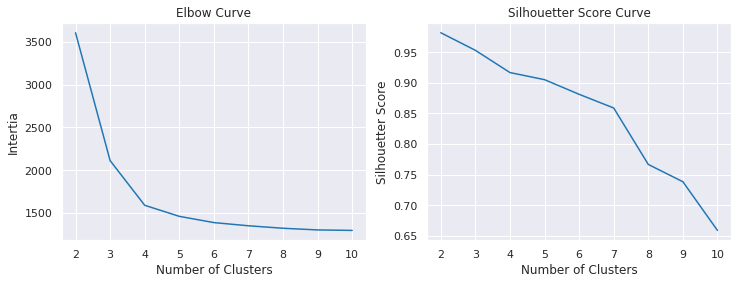

In [173]:
sns.set_context("notebook")
fig, ax = plt.subplots(1,2, figsize=(12,4))
# Plotting Elbow Curve
x_iner = [x[0] for x in inertia]
y_iner  = [x[1] for x in inertia]
ax[0].plot(x_iner, y_iner)
ax[0].set_xlabel('Number of Clusters')
ax[0].set_ylabel('Intertia')
ax[0].set_title('Elbow Curve')


# Plotting Silhouetter Score
x_sil = [x[0] for x in sil]
y_sil  = [x[1] for x in sil]
ax[1].plot(x_sil, y_sil)
ax[1].set_xlabel('Number of Clusters')
ax[1].set_ylabel('Silhouetter Score')
ax[1].set_title('Silhouetter Score Curve')

In [174]:
# We retain 3 clusters due to inertia and the silhouette curve
n_former_cluster = 4
y_pred = KMeans(n_clusters=4, init = 'random', random_state = 7)
y_pred.fit(X)
cluster_label = y_pred.predict(X)

In [175]:
for i in range(4):
    print(i,len(cluster_label[cluster_label==i]))

0 10
1 66
2 10
3 1937


In [176]:
clusters  = pd.Series(y_pred.labels_)
dataset_scale = dataset_scale.assign(centroids=clusters.values)

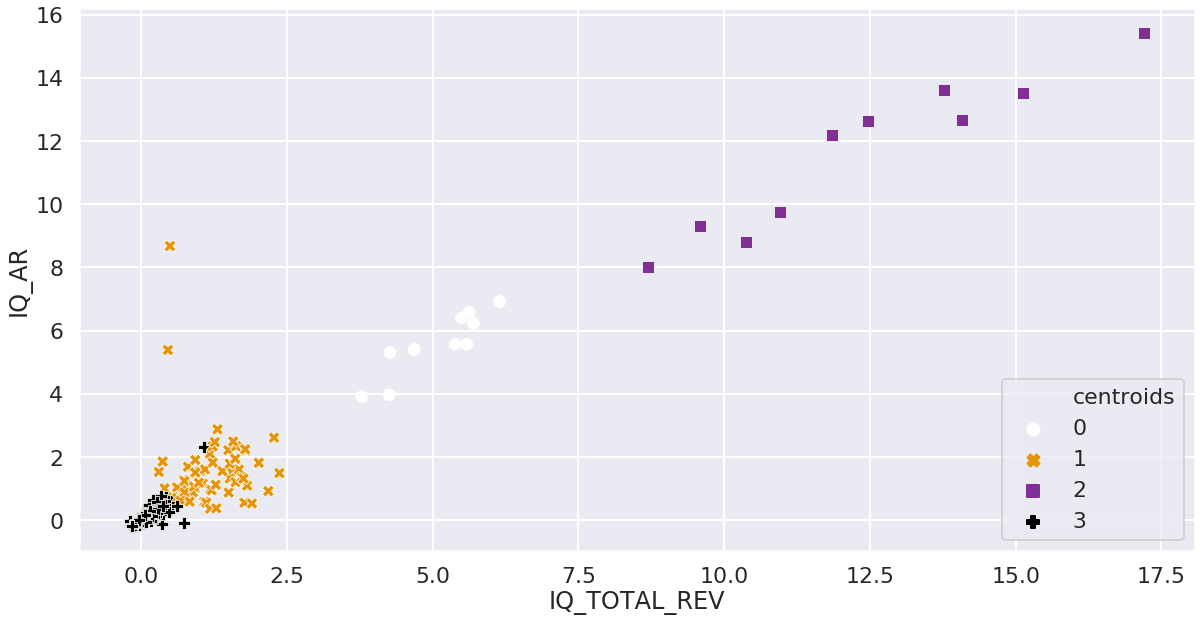

In [177]:
sns.set_context("poster")
sns.set_style("darkgrid")
plt.figure(figsize=(20,10))
ax = sns.scatterplot(x="IQ_TOTAL_REV", y="IQ_AR", hue="centroids",style = "centroids",palette =  "CMRmap_r",data = dataset_scale)

# Provide a dictionary to the palette argument
#ax = sns.scatterplot( x="IQ_EBIT", y="IQ_TOTAL_REV", data=dataset_choosen, fit_reg=False , hue = "centroids" , legend=False, palette=dict(0="#9b59b6", 1="#3498db", 2="#95a5a6" 3 = "#96a5B6"))
 
# Move the legend to an empty part of the plot
plt.legend(loc='lower right')
 
#sns.plt.show()

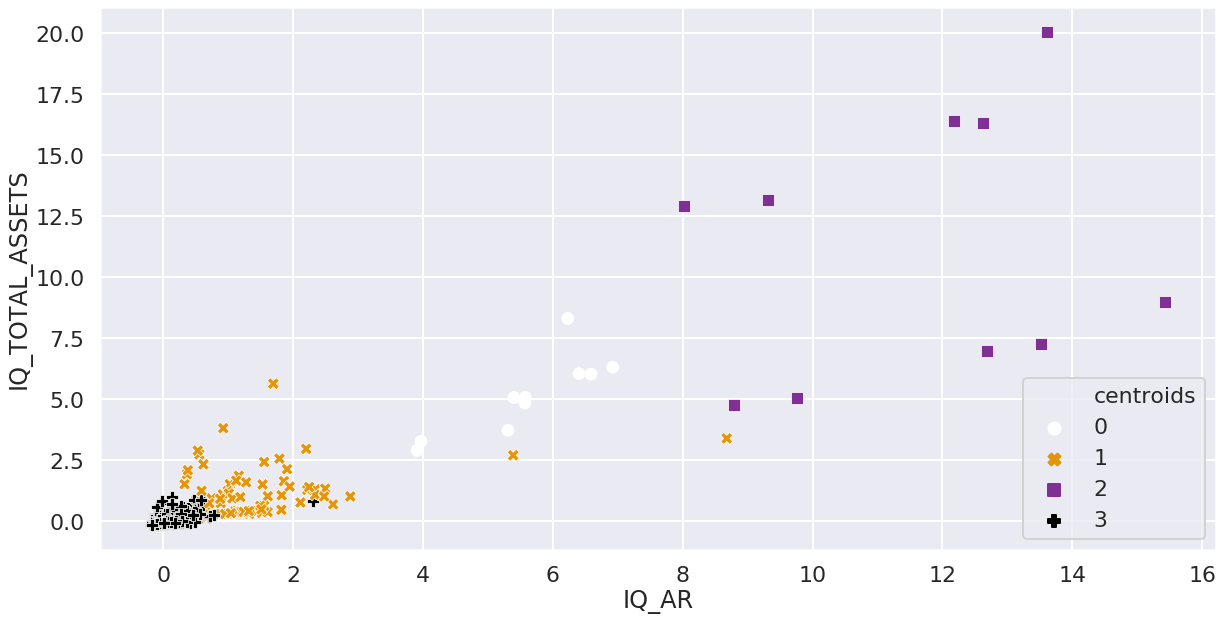

In [178]:
sns.set_context("poster")
sns.set_style("darkgrid")
plt.figure(figsize=(20,10))
ax = sns.scatterplot(x="IQ_AR", y="IQ_TOTAL_ASSETS", hue="centroids",style = "centroids",palette =  "CMRmap_r",data = dataset_scale)

# Provide a dictionary to the palette argument
#ax = sns.scatterplot( x="IQ_EBIT", y="IQ_TOTAL_REV", data=dataset_choosen, fit_reg=False , hue = "centroids" , legend=False, palette=dict(0="#9b59b6", 1="#3498db", 2="#95a5a6" 3 = "#96a5B6"))
 
# Move the legend to an empty part of the plot
plt.legend(loc='lower right')
 
#sns.plt.show()

In [179]:
dataset_scale.head()

,company,year,IQ_EBIT,IQ_TOTAL_OPER_EXPEN,IQ_OPER_INC,IQ_TOTAL_REV,IQ_AR,IQ_RE,IQ_TOTAL_ASSETS,centroids
0,IQ1004737,2014.0,-0.082657,-0.105469,-0.082657,-0.102901,-0.043919,-0.091575,-0.101657,3
1,IQ100546355,2016.0,-0.112290,-0.152696,-0.112290,-0.147580,-0.165432,-0.082681,-0.130756,3
2,IQ100546355,2017.0,-0.133536,-0.141042,-0.133536,-0.141969,-0.166284,-0.093209,-0.130310,3
3,IQ100842126,2014.0,-0.122353,-0.152588,-0.122353,-0.149398,-0.166380,-0.106163,-0.157064,3
4,IQ100842126,2015.0,-0.104113,-0.132686,-0.104113,-0.129481,-0.151715,-0.105450,-0.149209,3


0.994067237969677
[0.99111111 0.9925816  0.97774481]
Accuracy score: 0.9881422924901185


/home/perihan_balat86/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


[Text(1488.0, 1993.2, 'X[0] <= 6.305\nentropy = 0.713\nsamples = 1517\nvalue = [[4438.798, 2201.889]\n[4504.461, 2136.226]\n[4437.339, 2203.348]\n[6541.463, 99.224]]'),
 Text(1116.0, 1630.8000000000002, 'X[3] <= 3.031\nentropy = 0.538\nsamples = 1510\nvalue = [[2235.45, 2201.889]\n[2301.113, 2136.226]\n[4437.339, 0.0]\n[4338.115, 99.224]]'),
 Text(744.0, 1268.4, 'X[3] <= 0.361\nentropy = 0.131\nsamples = 1502\nvalue = [[2235.45, 0.0]\n[99.224, 2136.226]\n[2235.45, 0.0]\n[2136.226, 99.224]]'),
 Text(372.0, 906.0, 'entropy = 0.0\nsamples = 1436\nvalue = [[98.333, 0.0]\n[98.333, 0.0]\n[98.333, 0.0]\n[0.0, 98.333]]'),
 Text(1116.0, 906.0, 'X[4] <= 0.319\nentropy = 0.003\nsamples = 66\nvalue = [[2137.116, 0.0]\n[0.89, 2136.226]\n[2137.116, 0.0]\n[2136.226, 0.89]]'),
 Text(744.0, 543.5999999999999, 'entropy = 0.0\nsamples = 4\nvalue = [[0.274, 0.0]\n[0.274, 0.0]\n[0.274, 0.0]\n[0.0, 0.274]]'),
 Text(1488.0, 543.5999999999999, 'X[4] <= 0.545\nentropy = 0.002\nsamples = 62\nvalue = [[2136.843,

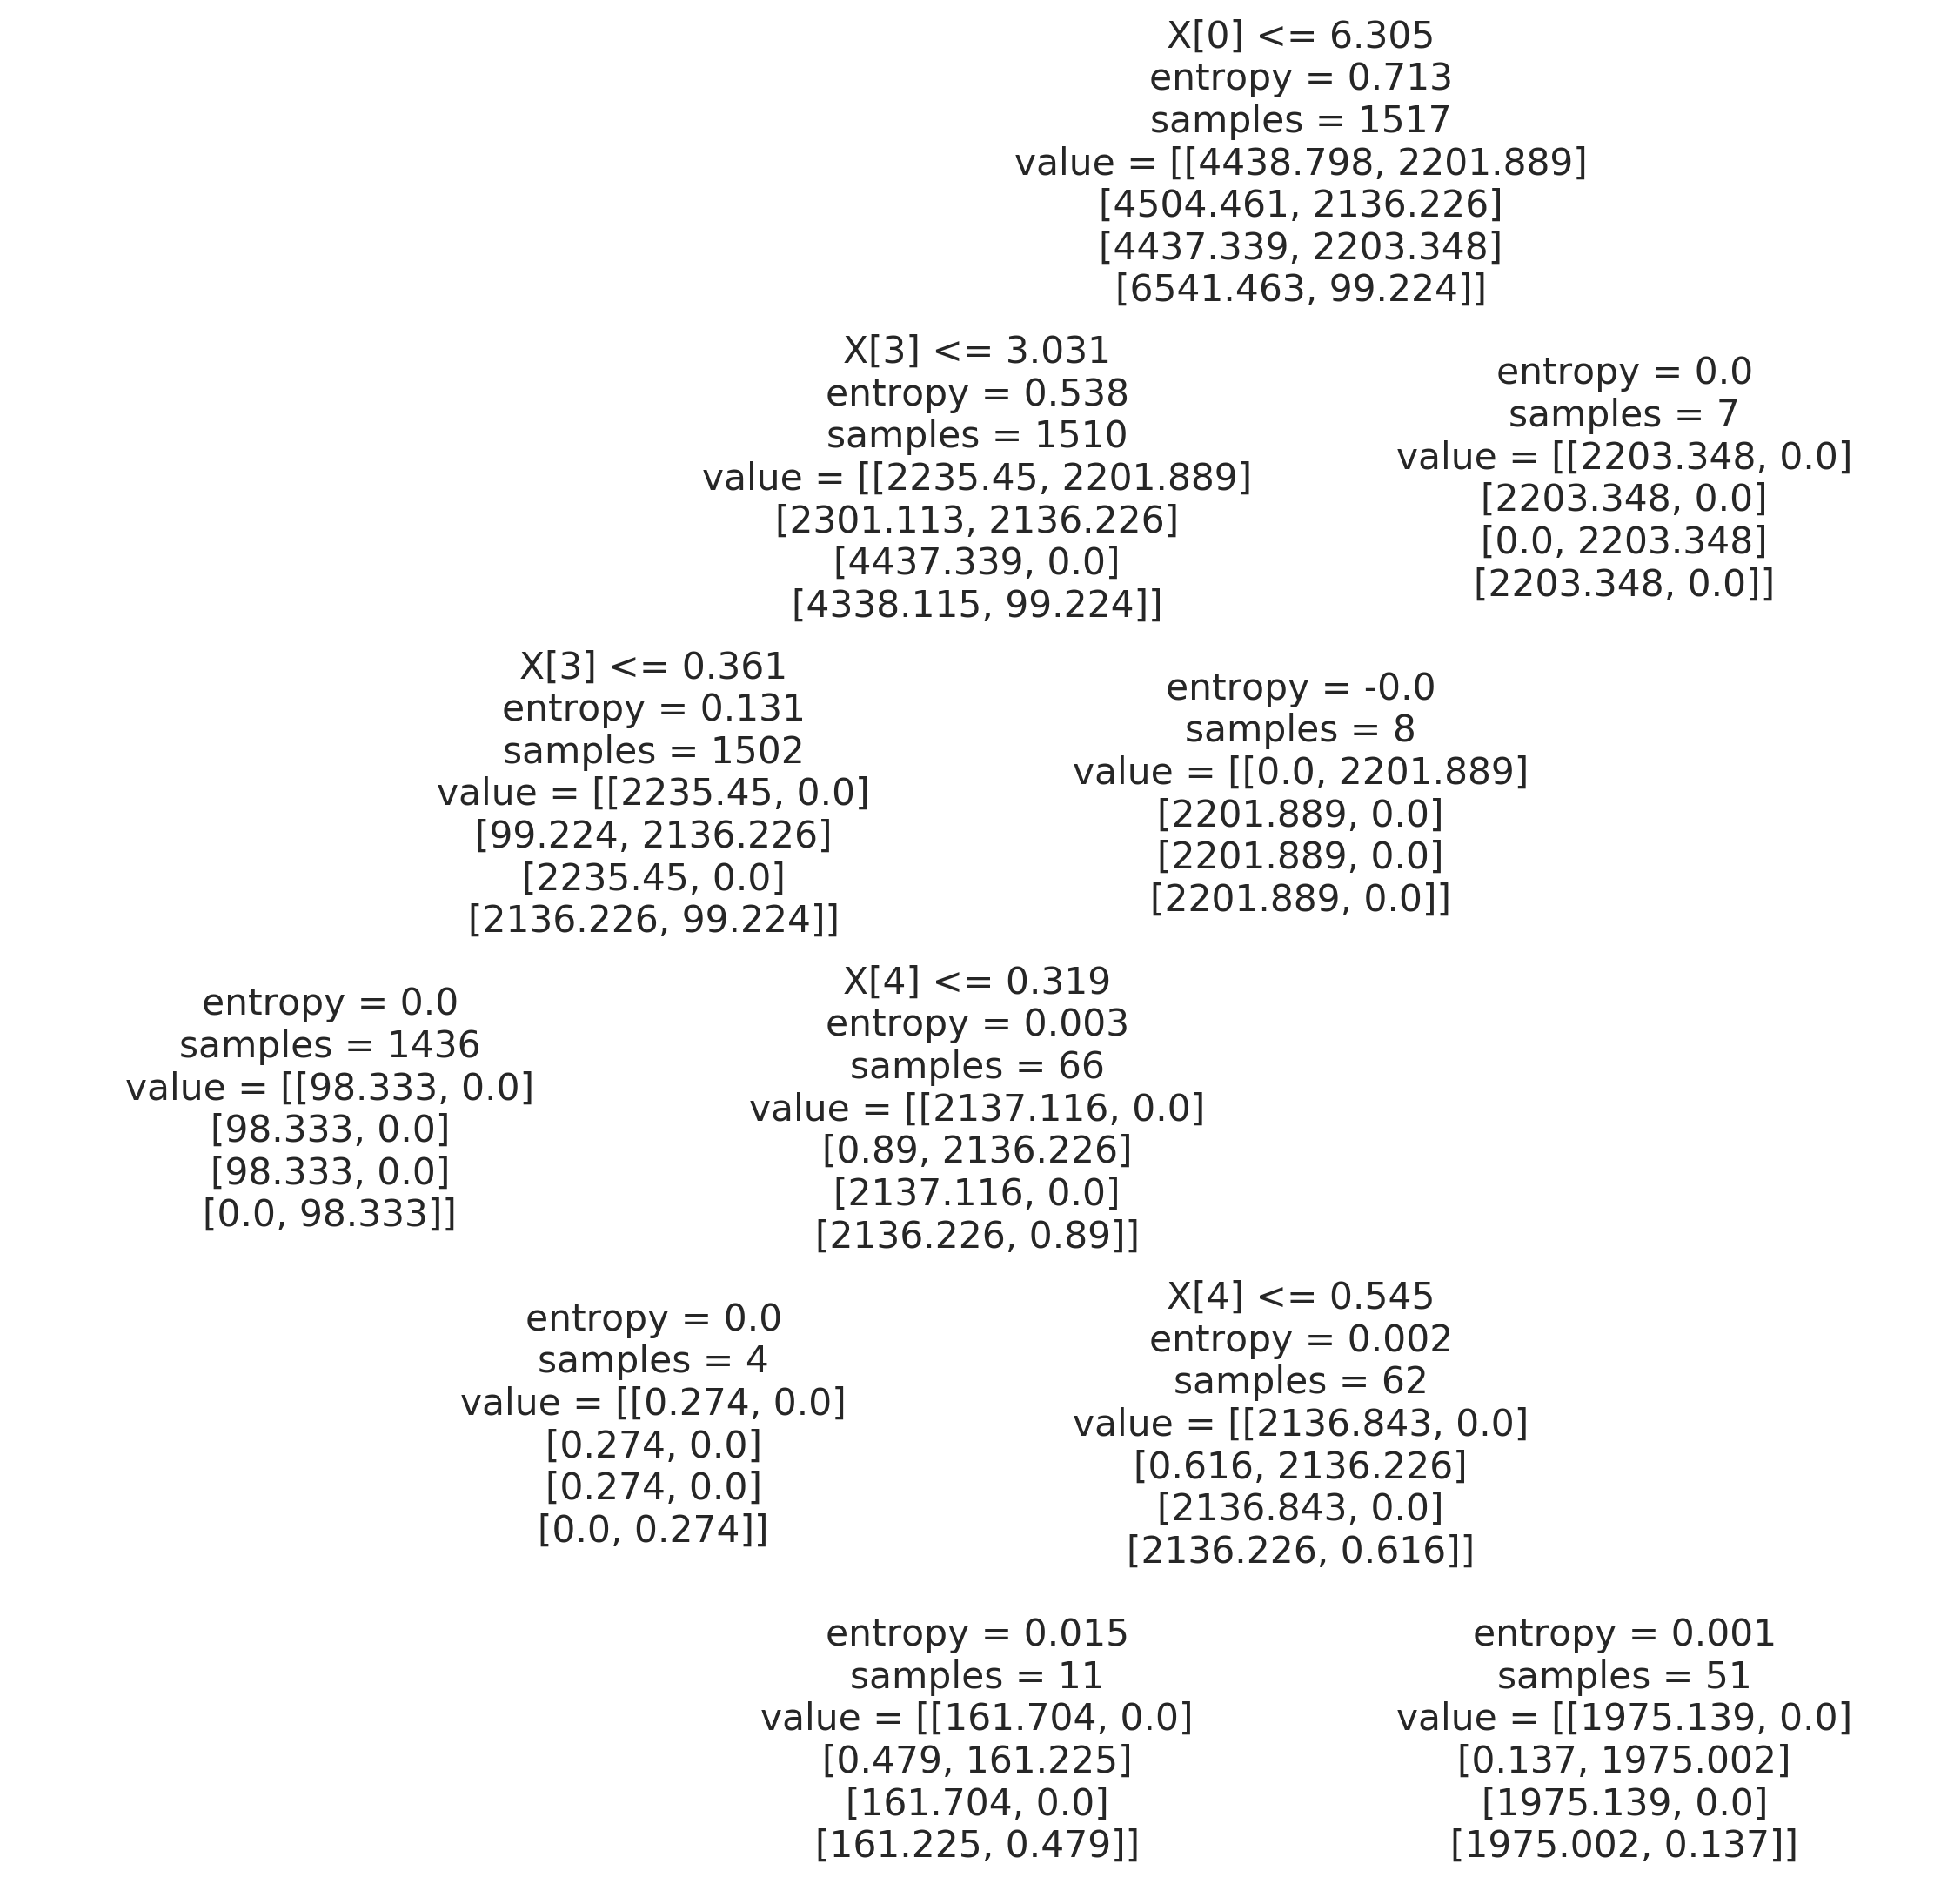

In [180]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn import tree
plt.rcParams["figure.figsize"]=40,40
X_scale  = dataset_scale.loc[:,"IQ_EBIT":"IQ_TOTAL_ASSETS"]
y_scale = pd.get_dummies(dataset_scale.loc[:,"centroids"])
X_scale_train,X_scale_test,y_scale_train,y_scale_test = train_test_split(X_scale,y_scale,random_state=0)
clf = tree.DecisionTreeClassifier(class_weight="balanced",criterion = "entropy",max_leaf_nodes = 6,random_state = 0)
clf.fit(X_scale_train, y_scale_train)
print(clf.score(X_scale_train,y_scale_train))
print(cross_val_score(clf,X_scale,y_scale))

y_pred_new = clf.predict(X_scale_test)
print("Accuracy score:",  metrics.accuracy_score(y_scale_test,y_pred_new))
tree.plot_tree(clf)

In [181]:
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None, 
                      feature_names= dataset_scale.columns[2:9],  
                      class_names= dataset_scale.centroids,  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data) 
graph.render("publicdecisiontreeincome")

'publicdecisiontreeincome.pdf'

In [182]:
# Count the number of element of a cluster depending 
def count_num_element(df,list_index,num_cluster,value = 1):
    return np.count_nonzero(df.loc[list_index][num_cluster]==value)
#np.count_nonzero(y_scale_train.loc[dataset_index_02][0]==1)
#count_num_element(y_scale_train,dataset_index_02,0)

In [183]:
def count_cluster_num_element(df, cluster_num):
    return len(df[df[cluster_num]== 1])
print("cluster 0: ",count_cluster_num_element(y_scale_train, 0))
print("cluster 1: ",count_cluster_num_element(y_scale_train, 1))
print("cluster 2: ",count_cluster_num_element(y_scale_train, 2))
print("cluster 3: ",count_cluster_num_element(y_scale_train, 3))

cluster 0:  8
cluster 1:  53
cluster 2:  7
cluster 3:  1449


In [184]:
# Get the index of points where IQ_NET_INTEREST_EXP > 3.064
dataset_index_00 = X_scale_train[X_scale_train['IQ_EBIT']> 6.305].index.tolist()
#print(dataset_index_00)

In [185]:
# Get the index of points where IQ_NET_INTEREST_EXP <= 3.064
dataset_index_01 = X_scale_train[X_scale_train['IQ_EBIT']<= 6.305].index.tolist()
print(len(dataset_index_01))

1510


0


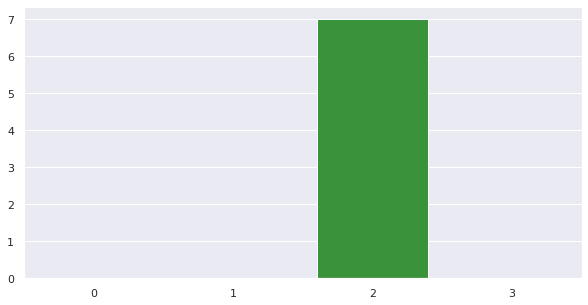

In [186]:
# Count for each cluster the number of points that have an IQ_NET_INTEREST_EXP > 3.064
num0 = count_num_element(y_scale_train,dataset_index_00,0)
print(num0)
num1 = count_num_element(y_scale_train,dataset_index_00,1)
num2 = count_num_element(y_scale_train,dataset_index_00,2)
num3 = count_num_element(y_scale_train,dataset_index_00,3)
sns.set_context("notebook")
sns.set_style("darkgrid")
plt.figure(figsize=(10,5))
sns.barplot(x = [0,1,2,3],y = [num0,num1,num2,num3])

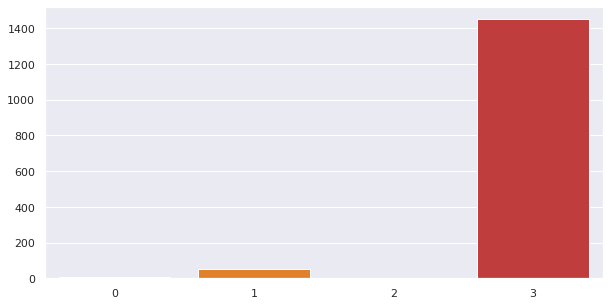

In [187]:
# Count for each cluster the number of points that have an IQ_NET_INTEREST_EXP <= 3.064
num0 = count_num_element(y_scale_train,dataset_index_01,0)
num1 = count_num_element(y_scale_train,dataset_index_01,1)
num2 = count_num_element(y_scale_train,dataset_index_01,2)
num3 = count_num_element(y_scale_train,dataset_index_01,3)
sns.set_context("notebook")
sns.set_style("darkgrid")
plt.figure(figsize=(10,5))
sns.barplot(x = [0,1,2,3],y = [num0,num1,num2,num3])

In [188]:
# Get the index of points where IQ_NET_INTEREST_EXP <= 3.614 and IQ_RE <= 0.396
dataset_index_02 = X_scale_train[X_scale_train['IQ_EBIT']<= 6.305][X_scale_train['IQ_TOTAL_REV']<= 3.031].index.tolist()

/home/perihan_balat86/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


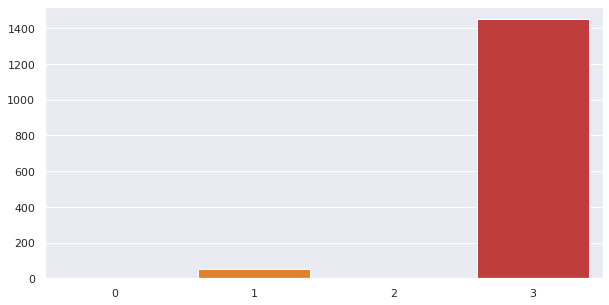

In [189]:
# Count for each cluster the number of points that have an IQ_NET_INTEREST_EXP > -3.405
num0 = count_num_element(y_scale_train,dataset_index_02,0)
num1 = count_num_element(y_scale_train,dataset_index_02,1)
num2 = count_num_element(y_scale_train,dataset_index_02,2)
num3 = count_num_element(y_scale_train,dataset_index_02,3)
sns.set_context("notebook")
sns.set_style("darkgrid")
plt.figure(figsize=(10,5))
sns.barplot(x = [0,1,2,3],y = [num0,num1,num2,num3])

In [190]:
#Get the index of points where IQ_TOTAL_CA <= 3.614 and IQ_RE <=.396
dataset_index_03 = X_scale_train[X_scale_train['IQ_EBIT']<= 6.305][X_scale_train['IQ_TOTAL_REV']<= 3.031][X_scale_train['IQ_AR']<= 0.319].index.tolist()

/home/perihan_balat86/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


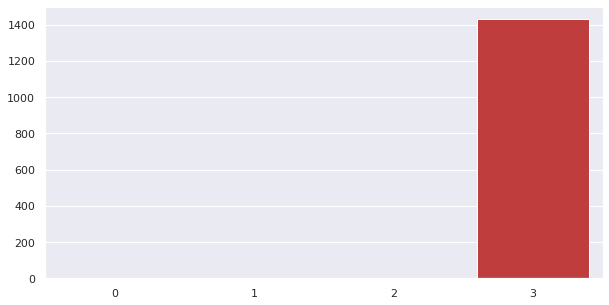

In [191]:
# Count for each cluster the number of points that have an IQ_NET_INTEREST_EXP > -3.405
num0 = count_num_element(y_scale_train,dataset_index_03,0)
num1 = count_num_element(y_scale_train,dataset_index_03,1)
num2 = count_num_element(y_scale_train,dataset_index_03,2)
num3 = count_num_element(y_scale_train,dataset_index_03,3)
sns.set_context("notebook")
sns.set_style("darkgrid")
plt.figure(figsize=(10,5))
sns.barplot(x = [0,1,2,3],y = [num0,num1,num2,num3])

Text(0.5, 1.0, 'Silhouetter Score Curve')

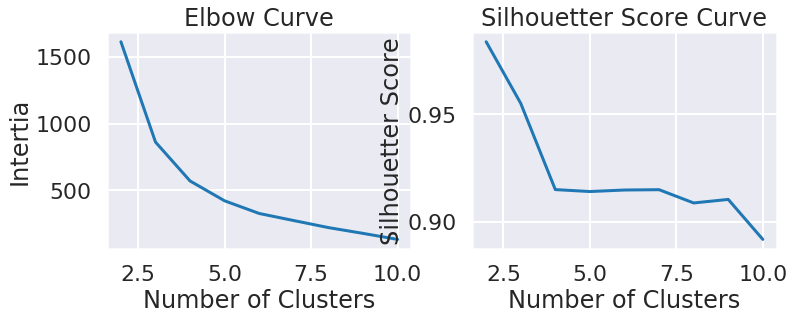

In [106]:
# Calulate the inertia and the silhouette score 
# Silhouette score : Cohesion (how close points in a cluster are relative to each other) 
# Silhouette score :  Separation (how far the clusters are relative to each other).
# changing the number of clusters
from sklearn.metrics import silhouette_samples, silhouette_score


inertia = [] # List of the inertia score for each cluster and plot the elbow curve(a measure of how internally coherent clusters are.)
sil = [] # List the silhouette score
X = scaled_features.loc[:,'IQ_EBIT':'IQ_OPER_INC']
for i in range(2,11):
    #plt.figure(figsize=(6, 6))
    
    # Predicting the clusters
    
    y_pred = KMeans(n_clusters=i,random_state = 0)
    y_pred.fit(X)
    cluster_label = y_pred.predict(X)
    inertia.append([i,y_pred.inertia_])
    sil.append((i, silhouette_score(X, cluster_label)))

fig, ax = plt.subplots(1,2, figsize=(12,4))
# Plotting Elbow Curve
x_iner = [x[0] for x in inertia]
y_iner  = [x[1] for x in inertia]
ax[0].plot(x_iner, y_iner)
ax[0].set_xlabel('Number of Clusters')
ax[0].set_ylabel('Intertia')
ax[0].set_title('Elbow Curve')


# Plotting Silhouetter Score
x_sil = [x[0] for x in sil]
y_sil  = [x[1] for x in sil]
ax[1].plot(x_sil, y_sil)
ax[1].set_xlabel('Number of Clusters')
ax[1].set_ylabel('Silhouetter Score')
ax[1].set_title('Silhouetter Score Curve')

In [107]:
# We retain 3 clusters due to inertia and the silhouette curve
y_pred = KMeans(n_clusters=3, random_state = 7)
y_pred.fit(X)
cluster_label = y_pred.predict(X)
centroid = y_pred.cluster_centers_



centroid

array([[-0.08603754, -0.09321795, -0.09340975, -0.08603754],
       [13.17121006, 11.98577209, 12.41014298, 13.17121006],
       [ 2.50655418,  4.14365726,  3.90236565,  2.50655418]])

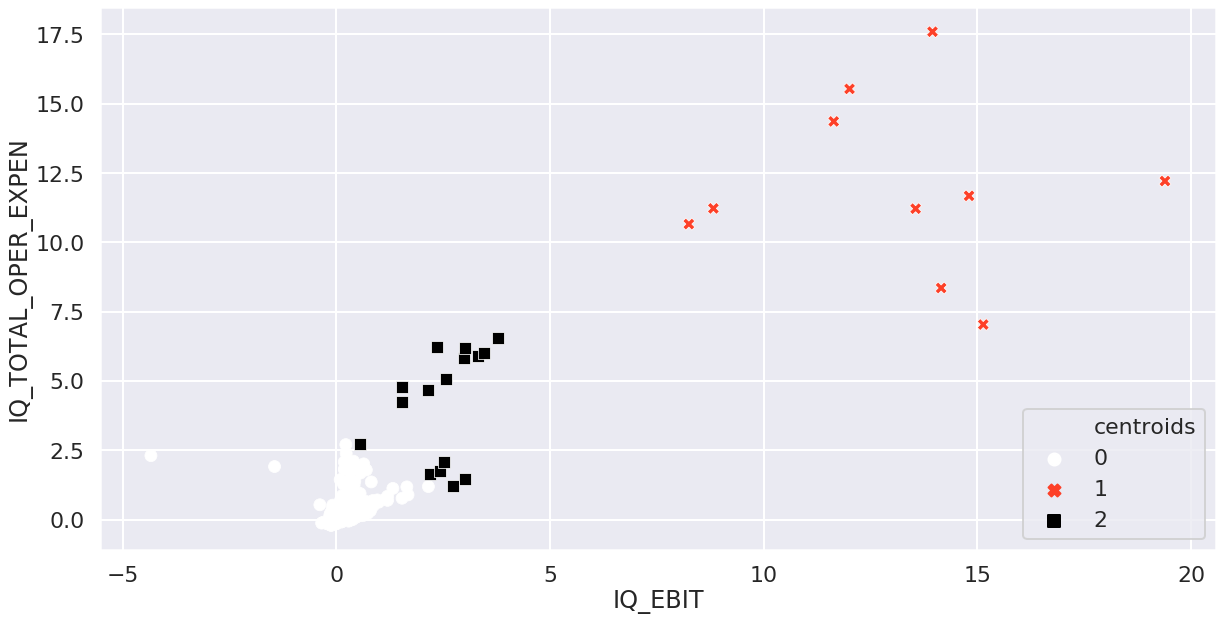

In [108]:
# Get the clusters for each row
clusters  = pd.Series(y_pred.labels_)
scaled_features = scaled_features.assign(centroids=clusters.values)

#Add a new column to the dataframe defining the cluster for each row
scaled_features.head()

sns.set_context("poster")
sns.set_style("darkgrid")
plt.figure(figsize=(20,10))
ax = sns.scatterplot(x="IQ_EBIT", y="IQ_TOTAL_OPER_EXPEN", hue="centroids",style = "centroids",palette =  "CMRmap_r",data = scaled_features)


plt.legend(loc='lower right')
 
#sns.plt.show()

In [109]:
for i in range(3):
    print(i,len(cluster_label[cluster_label==i]))

0 1997
1 10
2 16


In [110]:
#Get all the rows in the zero cluster
#Get all the index of these rows
#Build a dictionary wit indexes of these rows and zero
scaled_features_clust = scaled_features[scaled_features['centroids']==0]
scaled_features_index_0 = scaled_features.index[scaled_features['centroids']==0].tolist()
dict_index =  dict(zip(scaled_features_index_0,[0]*len(scaled_features_index_0)))
print(len(dict_index))

1997


In [111]:
#Mix all the clusters 
for key in list(dict_index.keys()):
    scaled_features.loc[key,'centroids']= dict_index[key]

In [112]:
new_dataset_clust0 =scaled_features.loc[scaled_features['centroids']==0]

[Text(1116.0, 1812.0, 'X[0] <= 2.152\ngini = 0.017\nsamples = 2023\nvalue = [[26, 1997]\n[2013, 10]\n[2007, 16]]'),
 Text(558.0, 1087.2, 'X[1] <= 2.719\ngini = 0.002\nsamples = 2000\nvalue = [[3, 1997]\n[2000, 0]\n[1997, 3]]'),
 Text(279.0, 362.39999999999986, 'gini = 0.0\nsamples = 1997\nvalue = [[0, 1997]\n[1997, 0]\n[1997, 0]]'),
 Text(837.0, 362.39999999999986, 'gini = 0.0\nsamples = 3\nvalue = [[3, 0]\n[3, 0]\n[0, 3]]'),
 Text(1674.0, 1087.2, 'X[1] <= 6.798\ngini = 0.328\nsamples = 23\nvalue = [[23, 0]\n[13, 10]\n[10, 13]]'),
 Text(1395.0, 362.39999999999986, 'gini = 0.0\nsamples = 13\nvalue = [[13, 0]\n[13, 0]\n[0, 13]]'),
 Text(1953.0, 362.39999999999986, 'gini = 0.0\nsamples = 10\nvalue = [[10, 0]\n[0, 10]\n[10, 0]]')]

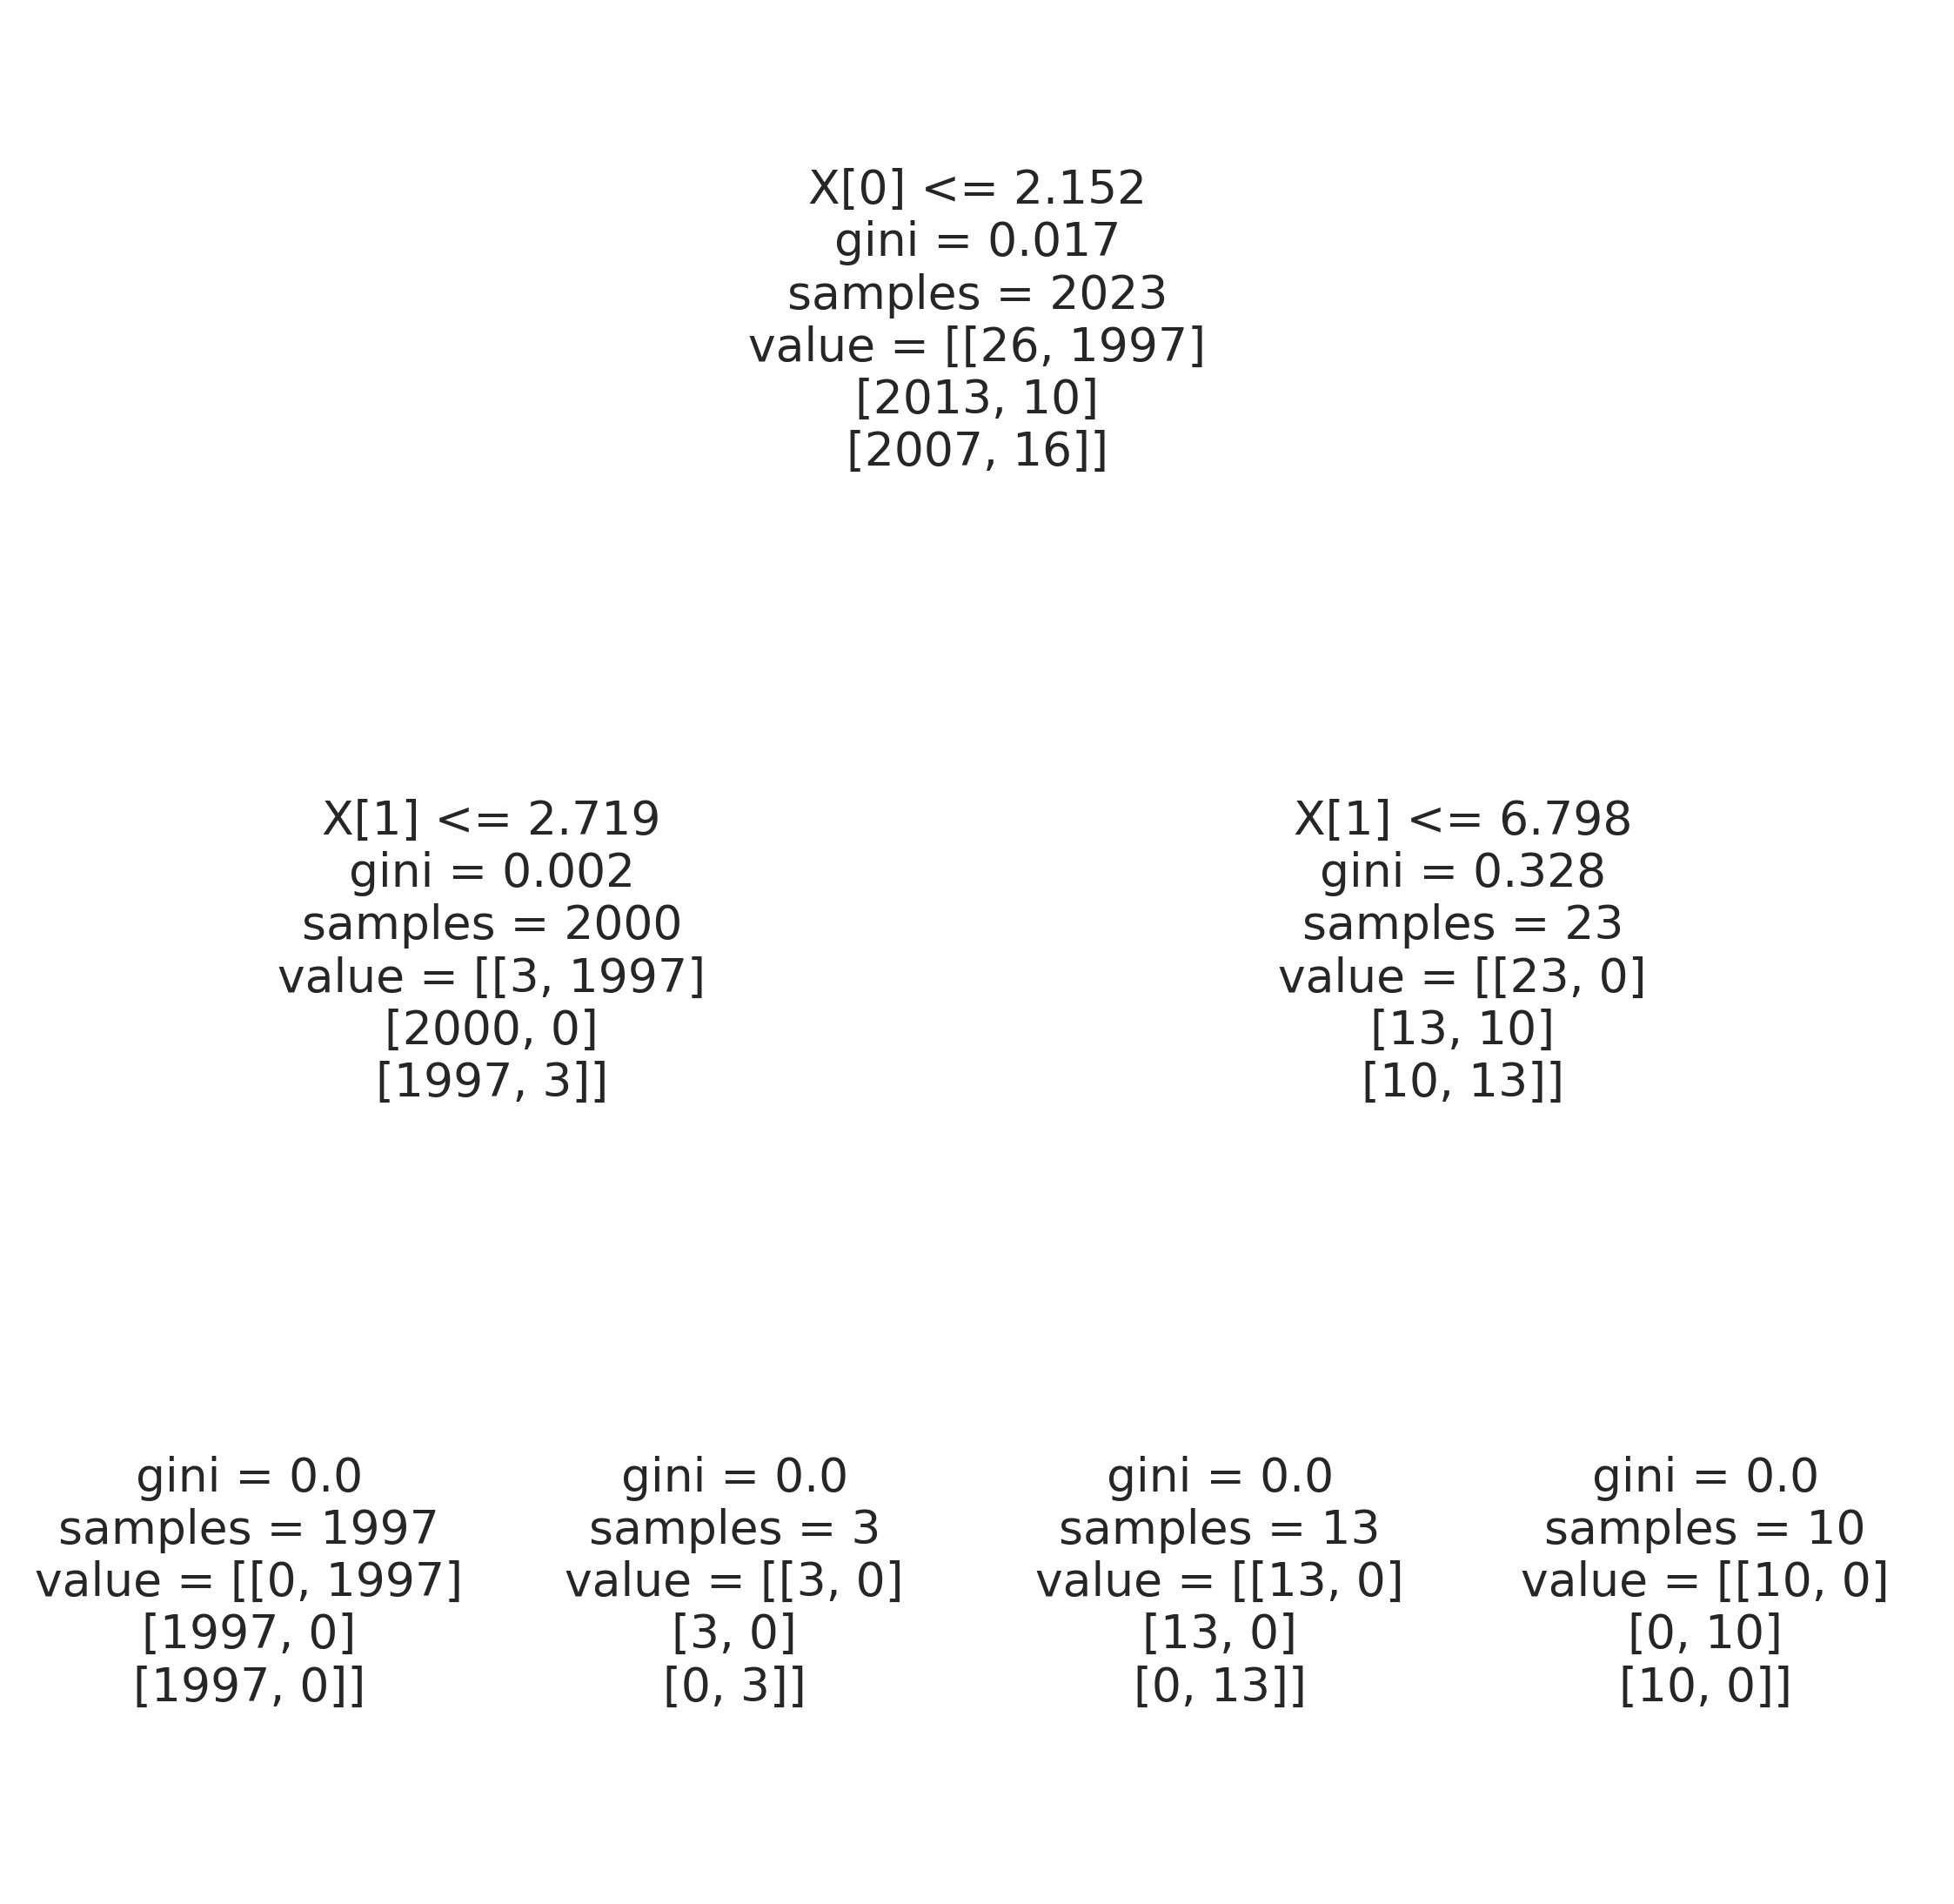

In [113]:
from sklearn import tree
plt.rcParams["figure.figsize"]=40,40
clf = tree.DecisionTreeClassifier()
clf = clf.fit(scaled_features.loc[:,"IQ_EBIT":"IQ_OPER_INC"],pd.get_dummies(scaled_features.loc[:,"centroids"]) )
tree.plot_tree(clf) 

In [ ]:
#len(scaled_features[scaled_features['IQ_EBIT']<= 2.203)

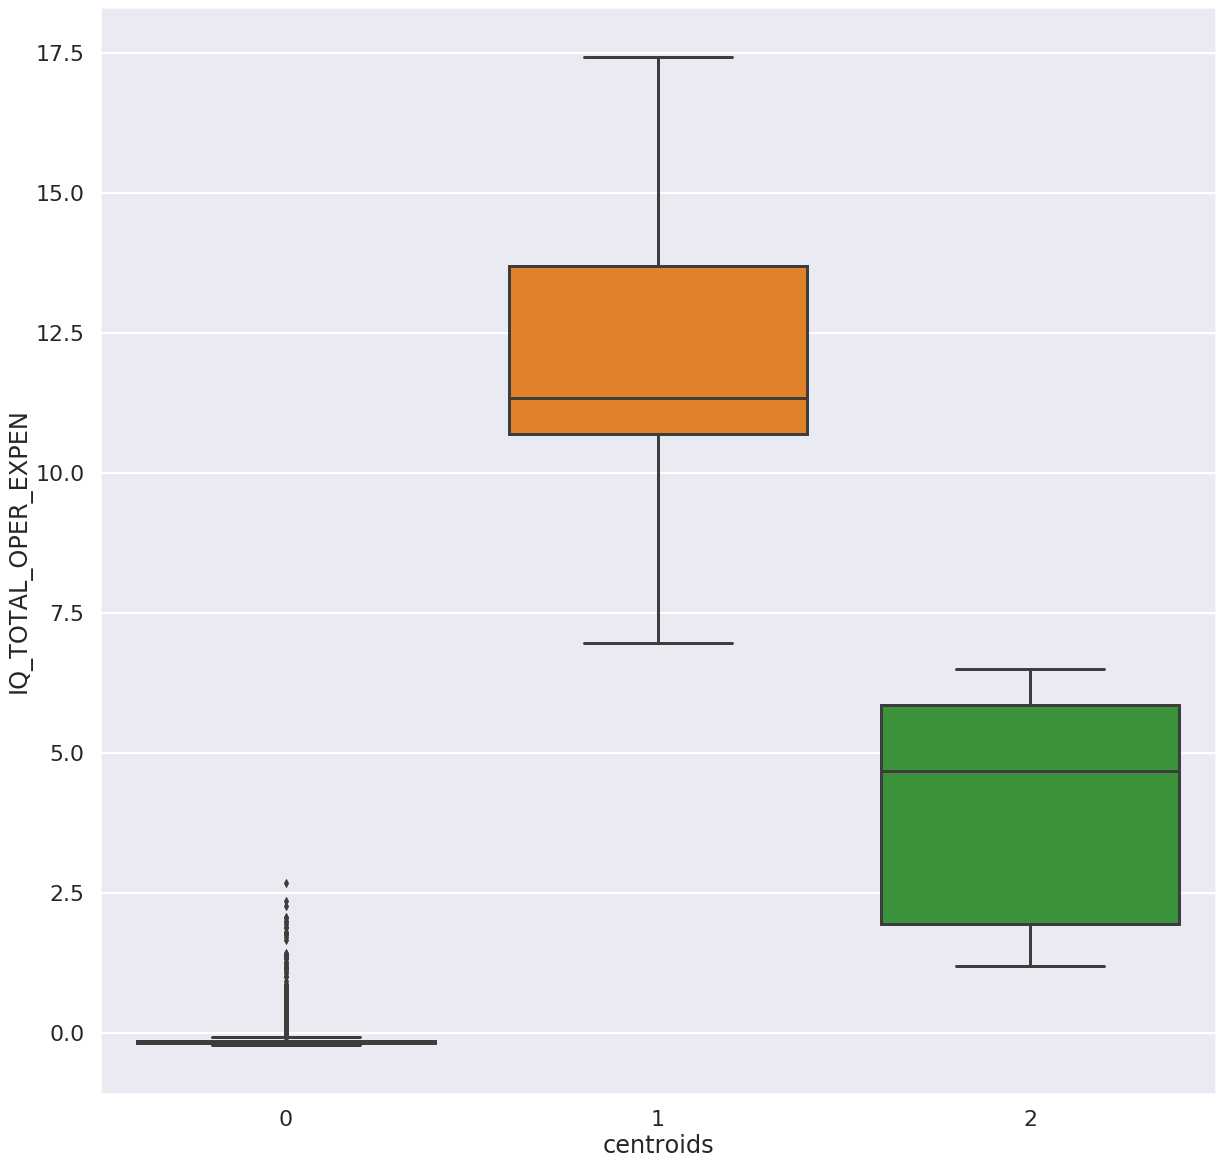

In [55]:
plt.rcParams["figure.figsize"]=20,20

sns.boxplot(x="centroids",y="IQ_TOTAL_OPER_EXPEN", data = scaled_features)

In [114]:
features = [ 'IQ_EBIT','IQ_TOTAL_OPER_EXPEN','IQ_TOTAL_REV','IQ_OPER_INC']

In [115]:
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None, 
                      feature_names= features,  
                      class_names= scaled_features.centroids,  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data) 
graph.render("decisiontreenewdatasetclust0")

'decisiontreenewdatasetclust0.pdf'

In [116]:
dataset = new_dataset_clust0.drop(['centroids'],axis=1)

Text(0.5, 1.0, 'Silhouetter Score Curve')

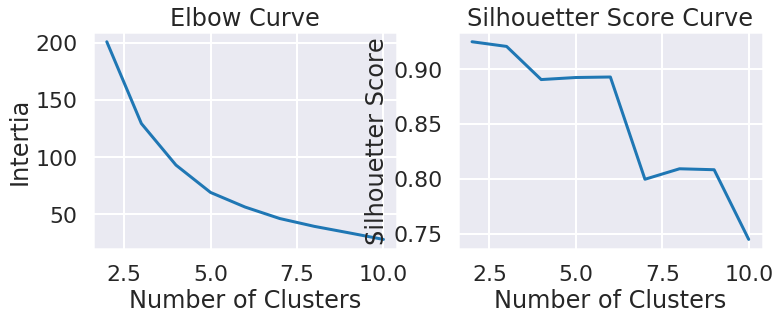

In [117]:
# Calulate the inertia and the silhouette score 
# Silhouette score : Cohesion (how close points in a cluster are relative to each other) 
# Silhouette score :  Separation (how far the clusters are relative to each other).
# changing the number of clusters
from sklearn.metrics import silhouette_samples, silhouette_score


inertia = [] # List of the inertia score for each cluster and plot the elbow curve(a measure of how internally coherent clusters are.)
sil = [] # List the silhouette score
X = dataset.loc[:,'IQ_AR':'IQ_TOTAL_ASSETS']
for i in range(2,11):
    #plt.figure(figsize=(6, 6))
    
    # Predicting the clusters
    
    y_pred = KMeans(n_clusters=i,random_state = 0)
    y_pred.fit(X)
    cluster_label = y_pred.predict(X)
    inertia.append([i,y_pred.inertia_])
    sil.append((i, silhouette_score(X, cluster_label)))

fig, ax = plt.subplots(1,2, figsize=(12,4))
# Plotting Elbow Curve
x_iner = [x[0] for x in inertia]
y_iner  = [x[1] for x in inertia]
ax[0].plot(x_iner, y_iner)
ax[0].set_xlabel('Number of Clusters')
ax[0].set_ylabel('Intertia')
ax[0].set_title('Elbow Curve')


# Plotting Silhouetter Score
x_sil = [x[0] for x in sil]
y_sil  = [x[1] for x in sil]
ax[1].plot(x_sil, y_sil)
ax[1].set_xlabel('Number of Clusters')
ax[1].set_ylabel('Silhouetter Score')
ax[1].set_title('Silhouetter Score Curve')

In [118]:
# We retain 3 clusters due to inertia and the silhouette curve
y_pred = KMeans(n_clusters=3, random_state = 7)
y_pred.fit(X)
cluster_label = y_pred.predict(X)
centroid = y_pred.cluster_centers_



centroid

array([[-0.14287393, -0.09025667, -0.13145389],
       [ 1.22555588,  0.2791081 ,  1.01672917],
       [ 7.0328556 ,  0.18596798,  3.04954978]])

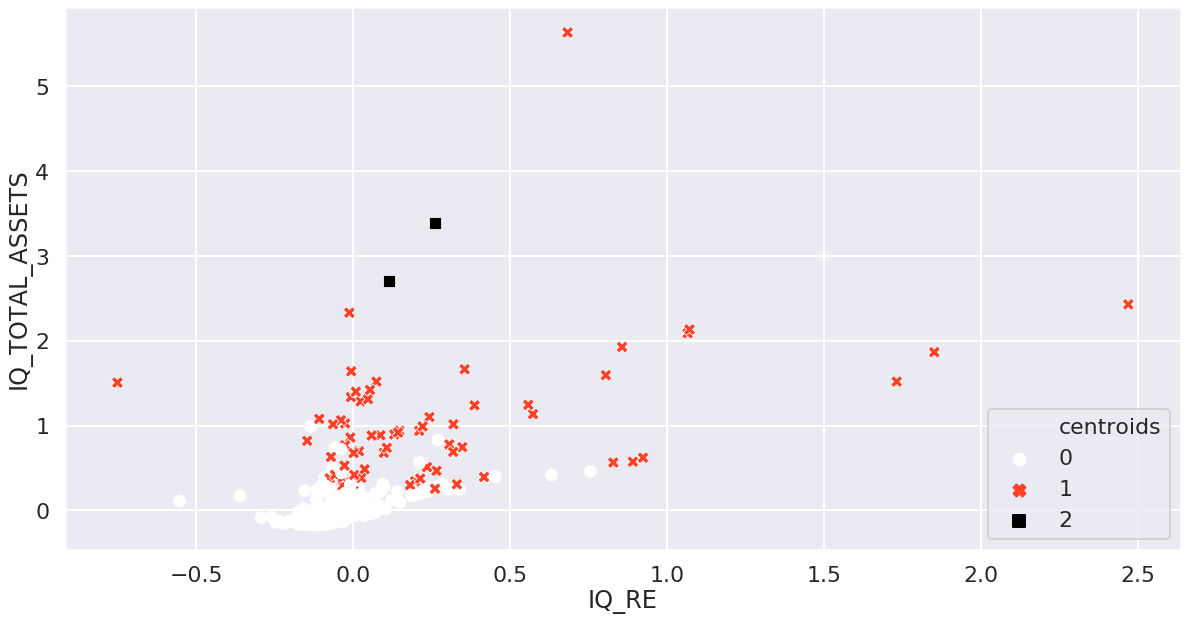

In [119]:
# Get the clusters for each row
clusters  = pd.Series(y_pred.labels_)
dataset = dataset.assign(centroids=clusters.values)

#Add a new column to the dataframe defining the cluster for each row
dataset.head()

sns.set_context("poster")
sns.set_style("darkgrid")
plt.figure(figsize=(20,10))
ax = sns.scatterplot(x="IQ_RE", y="IQ_TOTAL_ASSETS", hue="centroids",style = "centroids",palette =  "CMRmap_r",data = dataset)


plt.legend(loc='lower right')
 

In [120]:
for i in range(3):
    print(i,len(cluster_label[cluster_label==i]))

0 1928
1 67
2 2


In [121]:
#Get all the rows in the zero cluster
#Get all the index of these rows
#Build a dictionary wit indexes of these rows a
dataset_clust = dataset[dataset['centroids']==0]
dataset_index_0 = dataset.index[dataset['centroids']==0].tolist()
dict_index =  dict(zip(dataset_index_0,[0]*len(dataset_index_0)))
print(len(dict_index))

1928


In [122]:
#Mix all the clusters 
for key in list(dict_index.keys()):
    dataset.loc[key,'centroids']= dict_index[key]

In [123]:
dataset1 = dataset.loc[dataset['centroids']==0]

[Text(992.0, 1993.2, 'X[2] <= 0.292\ngini = 0.045\nsamples = 1997\nvalue = [[69, 1928]\n[1930, 67]\n[1995, 2]]'),
 Text(496.0, 1630.8000000000002, 'X[0] <= 0.754\ngini = 0.001\nsamples = 1915\nvalue = [[1, 1914]\n[1914, 1]\n[1915, 0]]'),
 Text(248.0, 1268.4, 'gini = 0.0\nsamples = 1914\nvalue = [[0, 1914]\n[1914, 0]\n[1914, 0]]'),
 Text(744.0, 1268.4, 'gini = 0.0\nsamples = 1\nvalue = [[1, 0]\n[0, 1]\n[1, 0]]'),
 Text(1488.0, 1630.8000000000002, 'X[0] <= 0.253\ngini = 0.215\nsamples = 82\nvalue = [[68, 14]\n[16, 66]\n[80, 2]]'),
 Text(1240.0, 1268.4, 'gini = 0.0\nsamples = 11\nvalue = [[0, 11]\n[11, 0]\n[11, 0]]'),
 Text(1736.0, 1268.4, 'X[0] <= 4.134\ngini = 0.089\nsamples = 71\nvalue = [[68, 3]\n[5, 66]\n[69, 2]]'),
 Text(1488.0, 906.0, 'X[0] <= 0.573\ngini = 0.055\nsamples = 69\nvalue = [[66, 3]\n[3, 66]\n[69, 0]]'),
 Text(1240.0, 543.5999999999999, 'X[2] <= 0.476\ngini = 0.224\nsamples = 14\nvalue = [[11, 3]\n[3, 11]\n[14, 0]]'),
 Text(992.0, 181.19999999999982, 'gini = 0.0\nsample

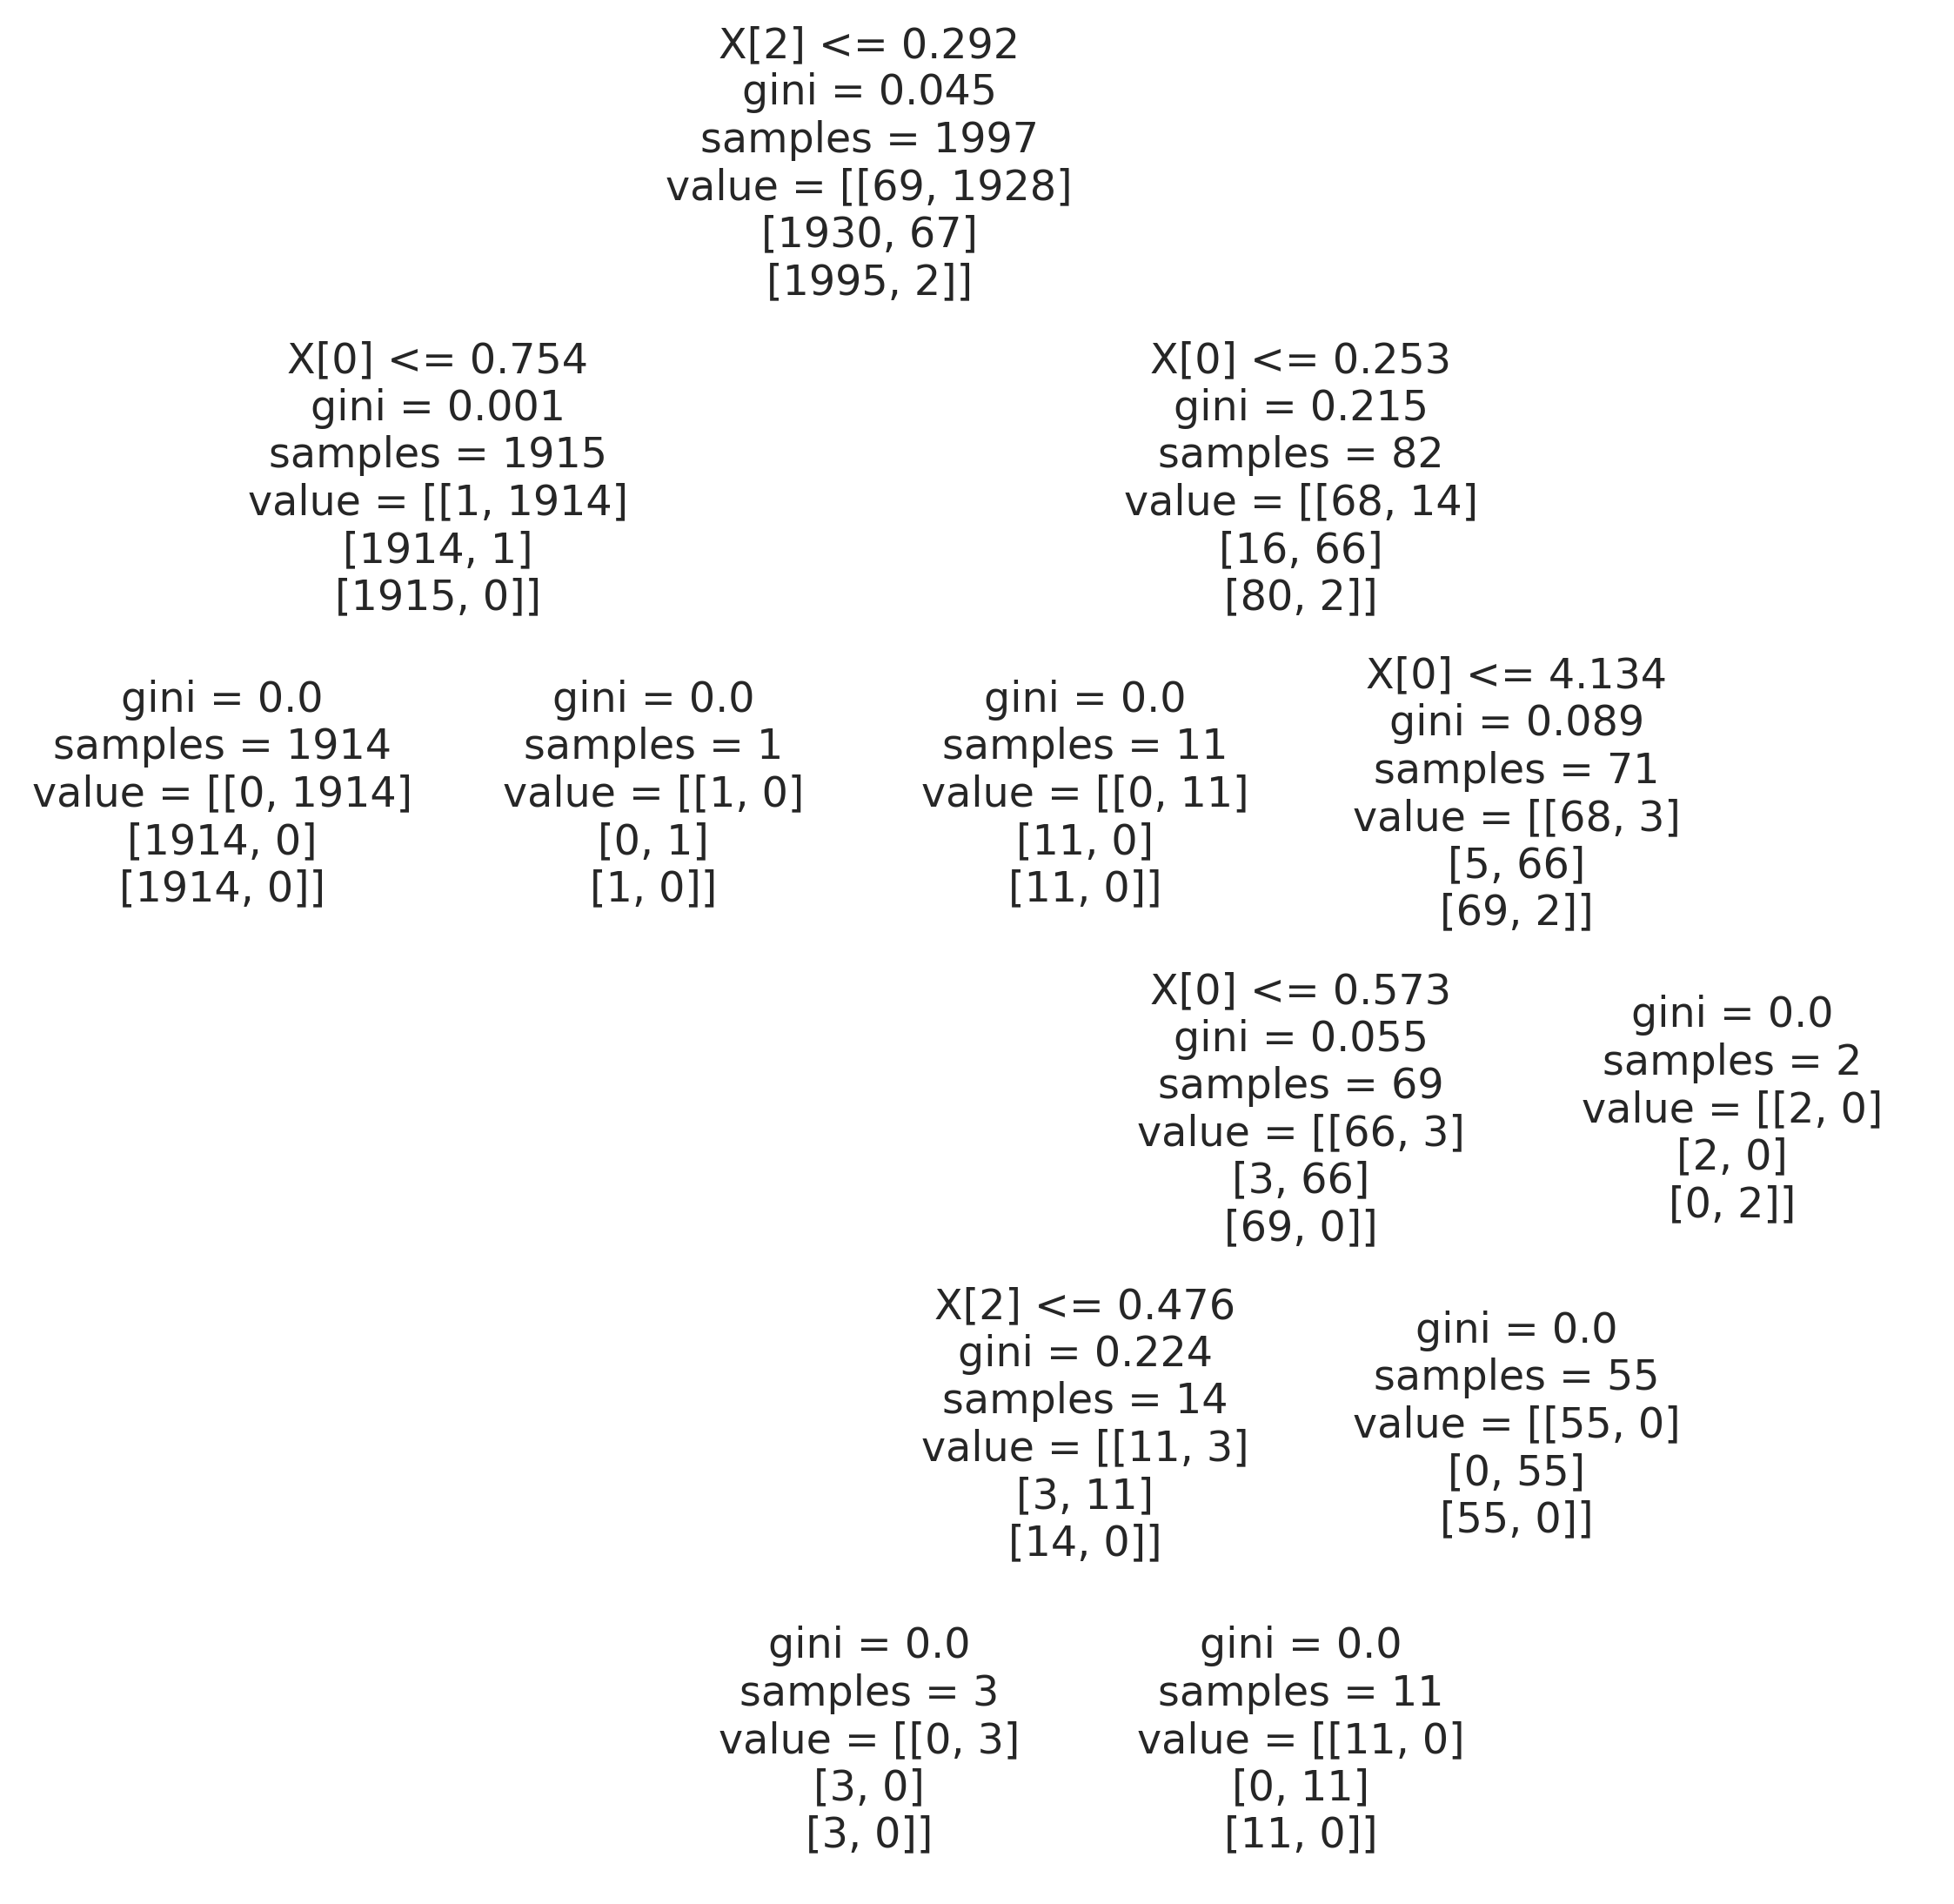

In [127]:
from sklearn import tree
plt.rcParams["figure.figsize"]=40,40
clf = tree.DecisionTreeClassifier()
clf = clf.fit(dataset.loc[:,"IQ_AR":"IQ_TOTAL_ASSETS"],pd.get_dummies(dataset.loc[:,"centroids"]) )
tree.plot_tree(clf) 

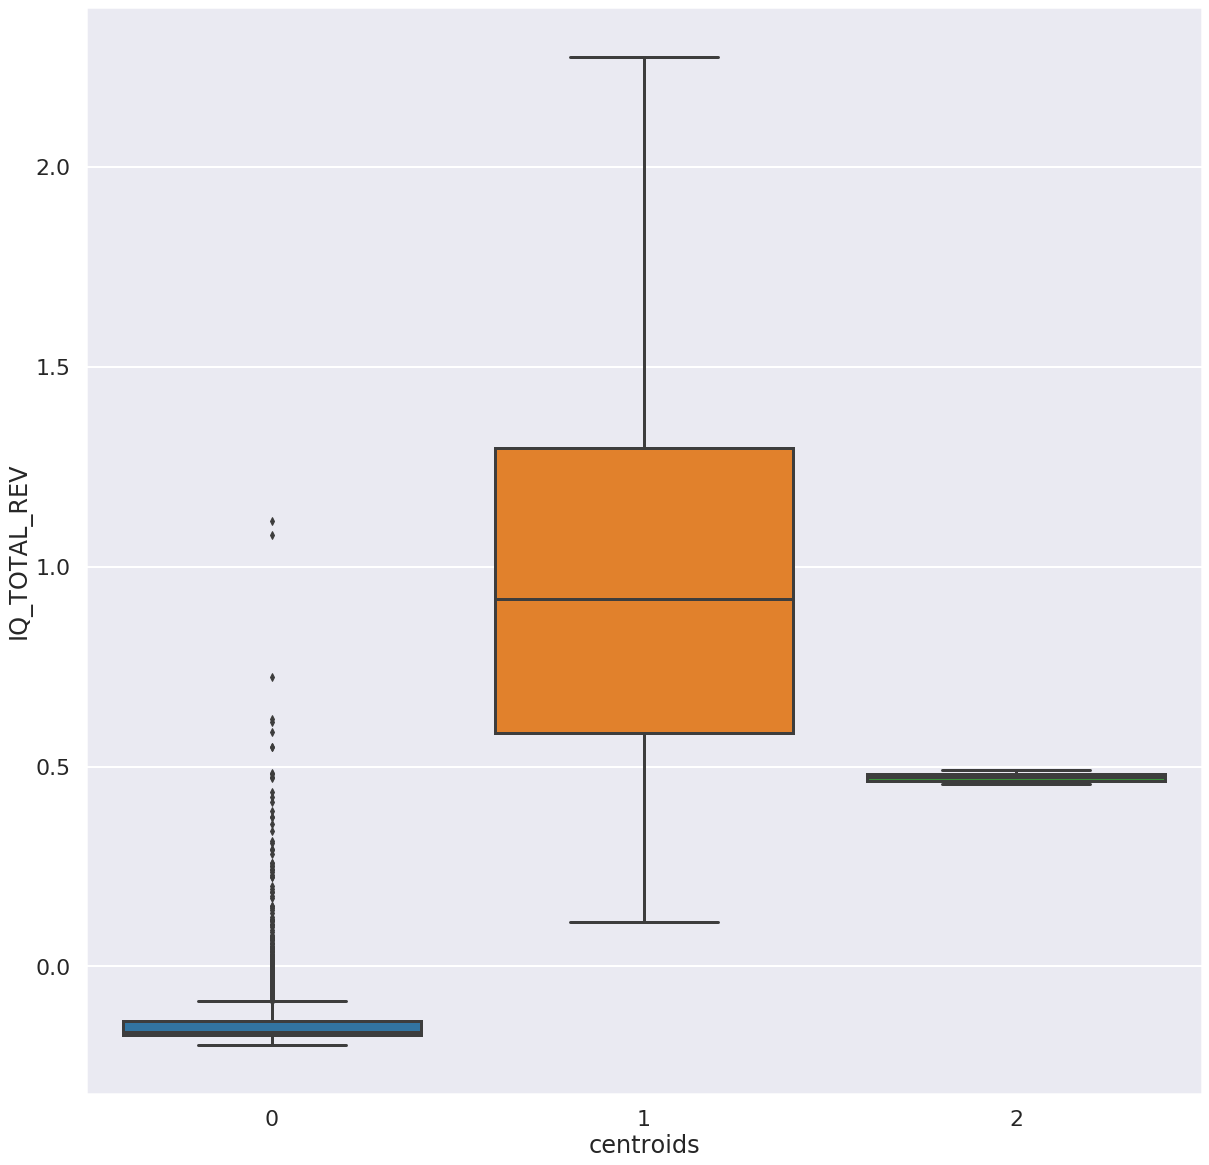

In [128]:
plt.rcParams["figure.figsize"]=20,20

sns.boxplot(x="centroids",y="IQ_TOTAL_REV", data = dataset)

In [129]:
features = ['IQ_AR','IQ_RE','IQ_EARNING_CO']

In [130]:
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None, 
                      feature_names= features,  
                      class_names= dataset.centroids,  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data) 
graph.render("decisiontreenewdataset1")

'decisiontreenewdataset1.pdf'

In [131]:
new_dataset1 = dataset.drop(['centroids'],axis=1)

In [132]:
new_dataset1.head()

,company,year,IQ_EBIT,IQ_TOTAL_OPER_EXPEN,IQ_TOTAL_REV,IQ_OPER_INC,IQ_AR,IQ_RE,IQ_TOTAL_ASSETS
0,IQ1004737,2014.0,-0.082657,-0.105469,-0.102901,-0.082657,-0.043919,-0.091575,-0.101657
1,IQ100546355,2016.0,-0.112290,-0.152696,-0.147580,-0.112290,-0.165432,-0.082681,-0.130756
2,IQ100546355,2017.0,-0.133536,-0.141042,-0.141969,-0.133536,-0.166284,-0.093209,-0.130310
3,IQ100842126,2014.0,-0.122353,-0.152588,-0.149398,-0.122353,-0.166380,-0.106163,-0.157064
4,IQ100842126,2015.0,-0.104113,-0.132686,-0.129481,-0.104113,-0.151715,-0.105450,-0.149209


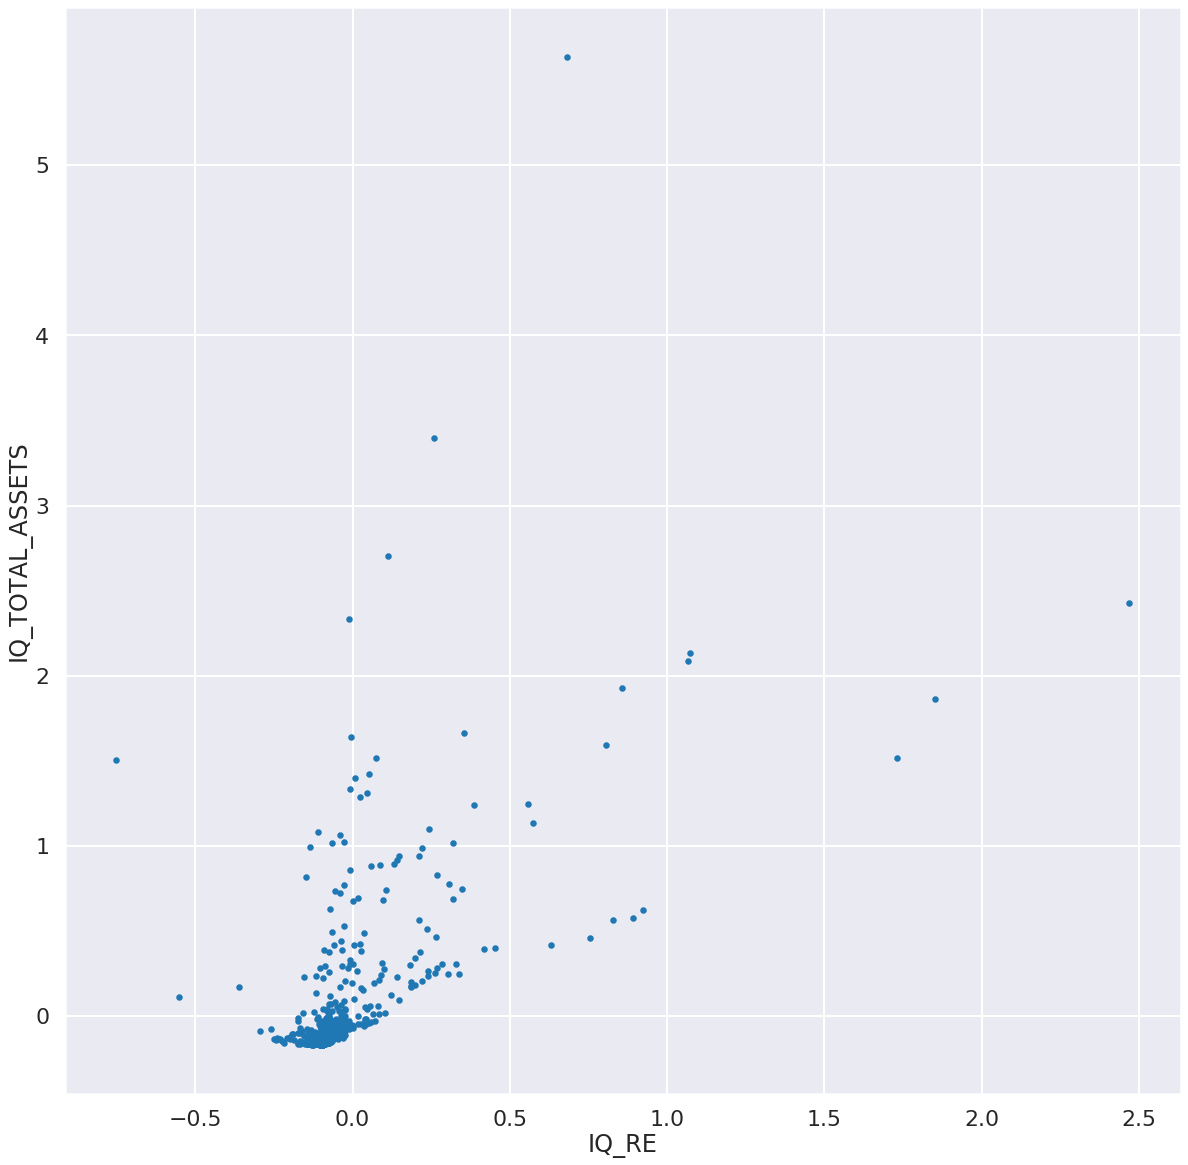

In [133]:
new_dataset1.plot(kind='scatter' , x='IQ_RE',y='IQ_TOTAL_ASSETS')

Text(0.5, 1.0, 'Silhouetter Score Curve')

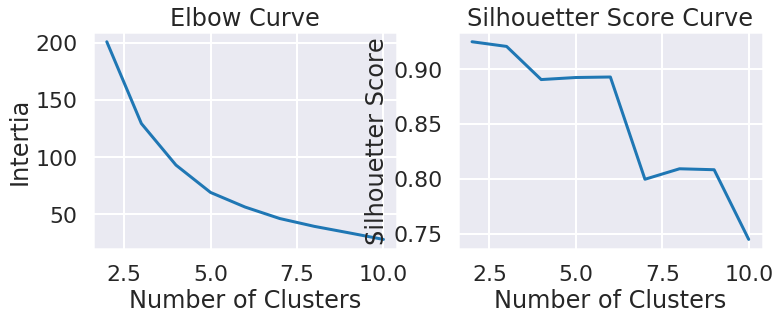

In [134]:
# Calulate the inertia and the silhouette score 
# Silhouette score : Cohesion (how close points in a cluster are relative to each other) 
# Silhouette score :  Separation (how far the clusters are relative to each other).
# changing the number of clusters
from sklearn.metrics import silhouette_samples, silhouette_score


inertia = [] # List of the inertia score for each cluster and plot the elbow curve(a measure of how internally coherent clusters are.)
sil = [] # List the silhouette score
X = new_dataset1.loc[:,'IQ_AR':]
for i in range(2,11):
    #plt.figure(figsize=(6, 6))
    
    # Predicting the clusters
    
    y_pred = KMeans(n_clusters=i,random_state = 0)
    y_pred.fit(X)
    cluster_label = y_pred.predict(X)
    inertia.append([i,y_pred.inertia_])
    sil.append((i, silhouette_score(X, cluster_label)))

fig, ax = plt.subplots(1,2, figsize=(12,4))
# Plotting Elbow Curve
x_iner = [x[0] for x in inertia]
y_iner  = [x[1] for x in inertia]
ax[0].plot(x_iner, y_iner)
ax[0].set_xlabel('Number of Clusters')
ax[0].set_ylabel('Intertia')
ax[0].set_title('Elbow Curve')


# Plotting Silhouetter Score
x_sil = [x[0] for x in sil]
y_sil  = [x[1] for x in sil]
ax[1].plot(x_sil, y_sil)
ax[1].set_xlabel('Number of Clusters')
ax[1].set_ylabel('Silhouetter Score')
ax[1].set_title('Silhouetter Score Curve')

In [135]:
# We retain 3 clusters due to inertia and the silhouette curve
y_pred = KMeans(n_clusters=3, random_state = 7)
y_pred.fit(X)
cluster_label = y_pred.predict(X)
centroid = y_pred.cluster_centers_



centroid

array([[-0.14287393, -0.09025667, -0.13145389],
       [ 1.22555588,  0.2791081 ,  1.01672917],
       [ 7.0328556 ,  0.18596798,  3.04954978]])

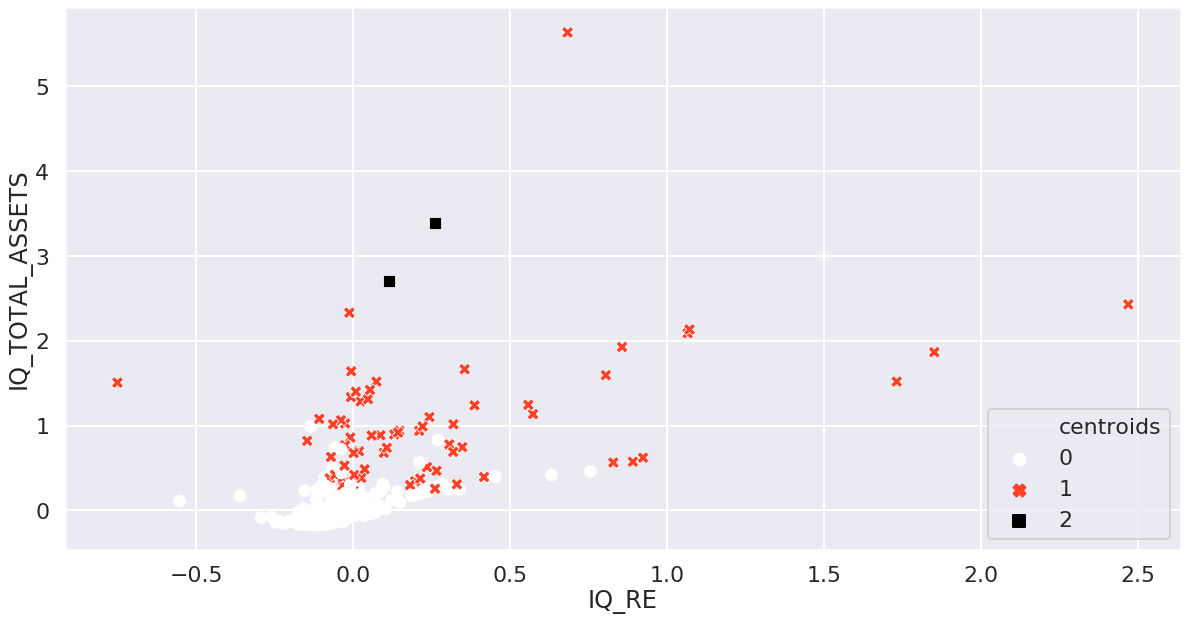

In [136]:
# Get the clusters for each row
clusters  = pd.Series(y_pred.labels_)
new_dataset1= new_dataset1.assign(centroids=clusters.values)

#Add a new column to the dataframe defining the cluster for each row
new_dataset1.head()

sns.set_context("poster")
sns.set_style("darkgrid")
plt.figure(figsize=(20,10))
ax = sns.scatterplot(x="IQ_RE", y="IQ_TOTAL_ASSETS", hue="centroids",style = "centroids",palette =  "CMRmap_r",data =new_dataset1)


plt.legend(loc='lower right')
 

In [137]:
for i in range(3):
    print(i,len(cluster_label[cluster_label==i]))

0 1928
1 67
2 2


In [138]:
#Get all the rows in the zero cluster
#Get all the index of these rows
#Build a dictionary wit indexes of these rows a
dataset2= new_dataset1[new_dataset1['centroids']==0]
dataset2_index_0 = new_dataset1.index[new_dataset1['centroids']==0].tolist()
dict_index =  dict(zip(dataset2_index_0,[0]*len(dataset2_index_0)))
print(len(dict_index))

1928


In [139]:
#Mix all the clusters 
for key in list(dict_index.keys()):
    new_dataset1.loc[key,'centroids']= dict_index[key]

[Text(992.0, 1993.2, 'X[2] <= 0.292\ngini = 0.045\nsamples = 1997\nvalue = [[69, 1928]\n[1930, 67]\n[1995, 2]]'),
 Text(496.0, 1630.8000000000002, 'X[0] <= 0.754\ngini = 0.001\nsamples = 1915\nvalue = [[1, 1914]\n[1914, 1]\n[1915, 0]]'),
 Text(248.0, 1268.4, 'gini = 0.0\nsamples = 1914\nvalue = [[0, 1914]\n[1914, 0]\n[1914, 0]]'),
 Text(744.0, 1268.4, 'gini = 0.0\nsamples = 1\nvalue = [[1, 0]\n[0, 1]\n[1, 0]]'),
 Text(1488.0, 1630.8000000000002, 'X[0] <= 0.253\ngini = 0.215\nsamples = 82\nvalue = [[68, 14]\n[16, 66]\n[80, 2]]'),
 Text(1240.0, 1268.4, 'gini = 0.0\nsamples = 11\nvalue = [[0, 11]\n[11, 0]\n[11, 0]]'),
 Text(1736.0, 1268.4, 'X[0] <= 4.134\ngini = 0.089\nsamples = 71\nvalue = [[68, 3]\n[5, 66]\n[69, 2]]'),
 Text(1488.0, 906.0, 'X[0] <= 0.573\ngini = 0.055\nsamples = 69\nvalue = [[66, 3]\n[3, 66]\n[69, 0]]'),
 Text(1240.0, 543.5999999999999, 'X[2] <= 0.476\ngini = 0.224\nsamples = 14\nvalue = [[11, 3]\n[3, 11]\n[14, 0]]'),
 Text(992.0, 181.19999999999982, 'gini = 0.0\nsample

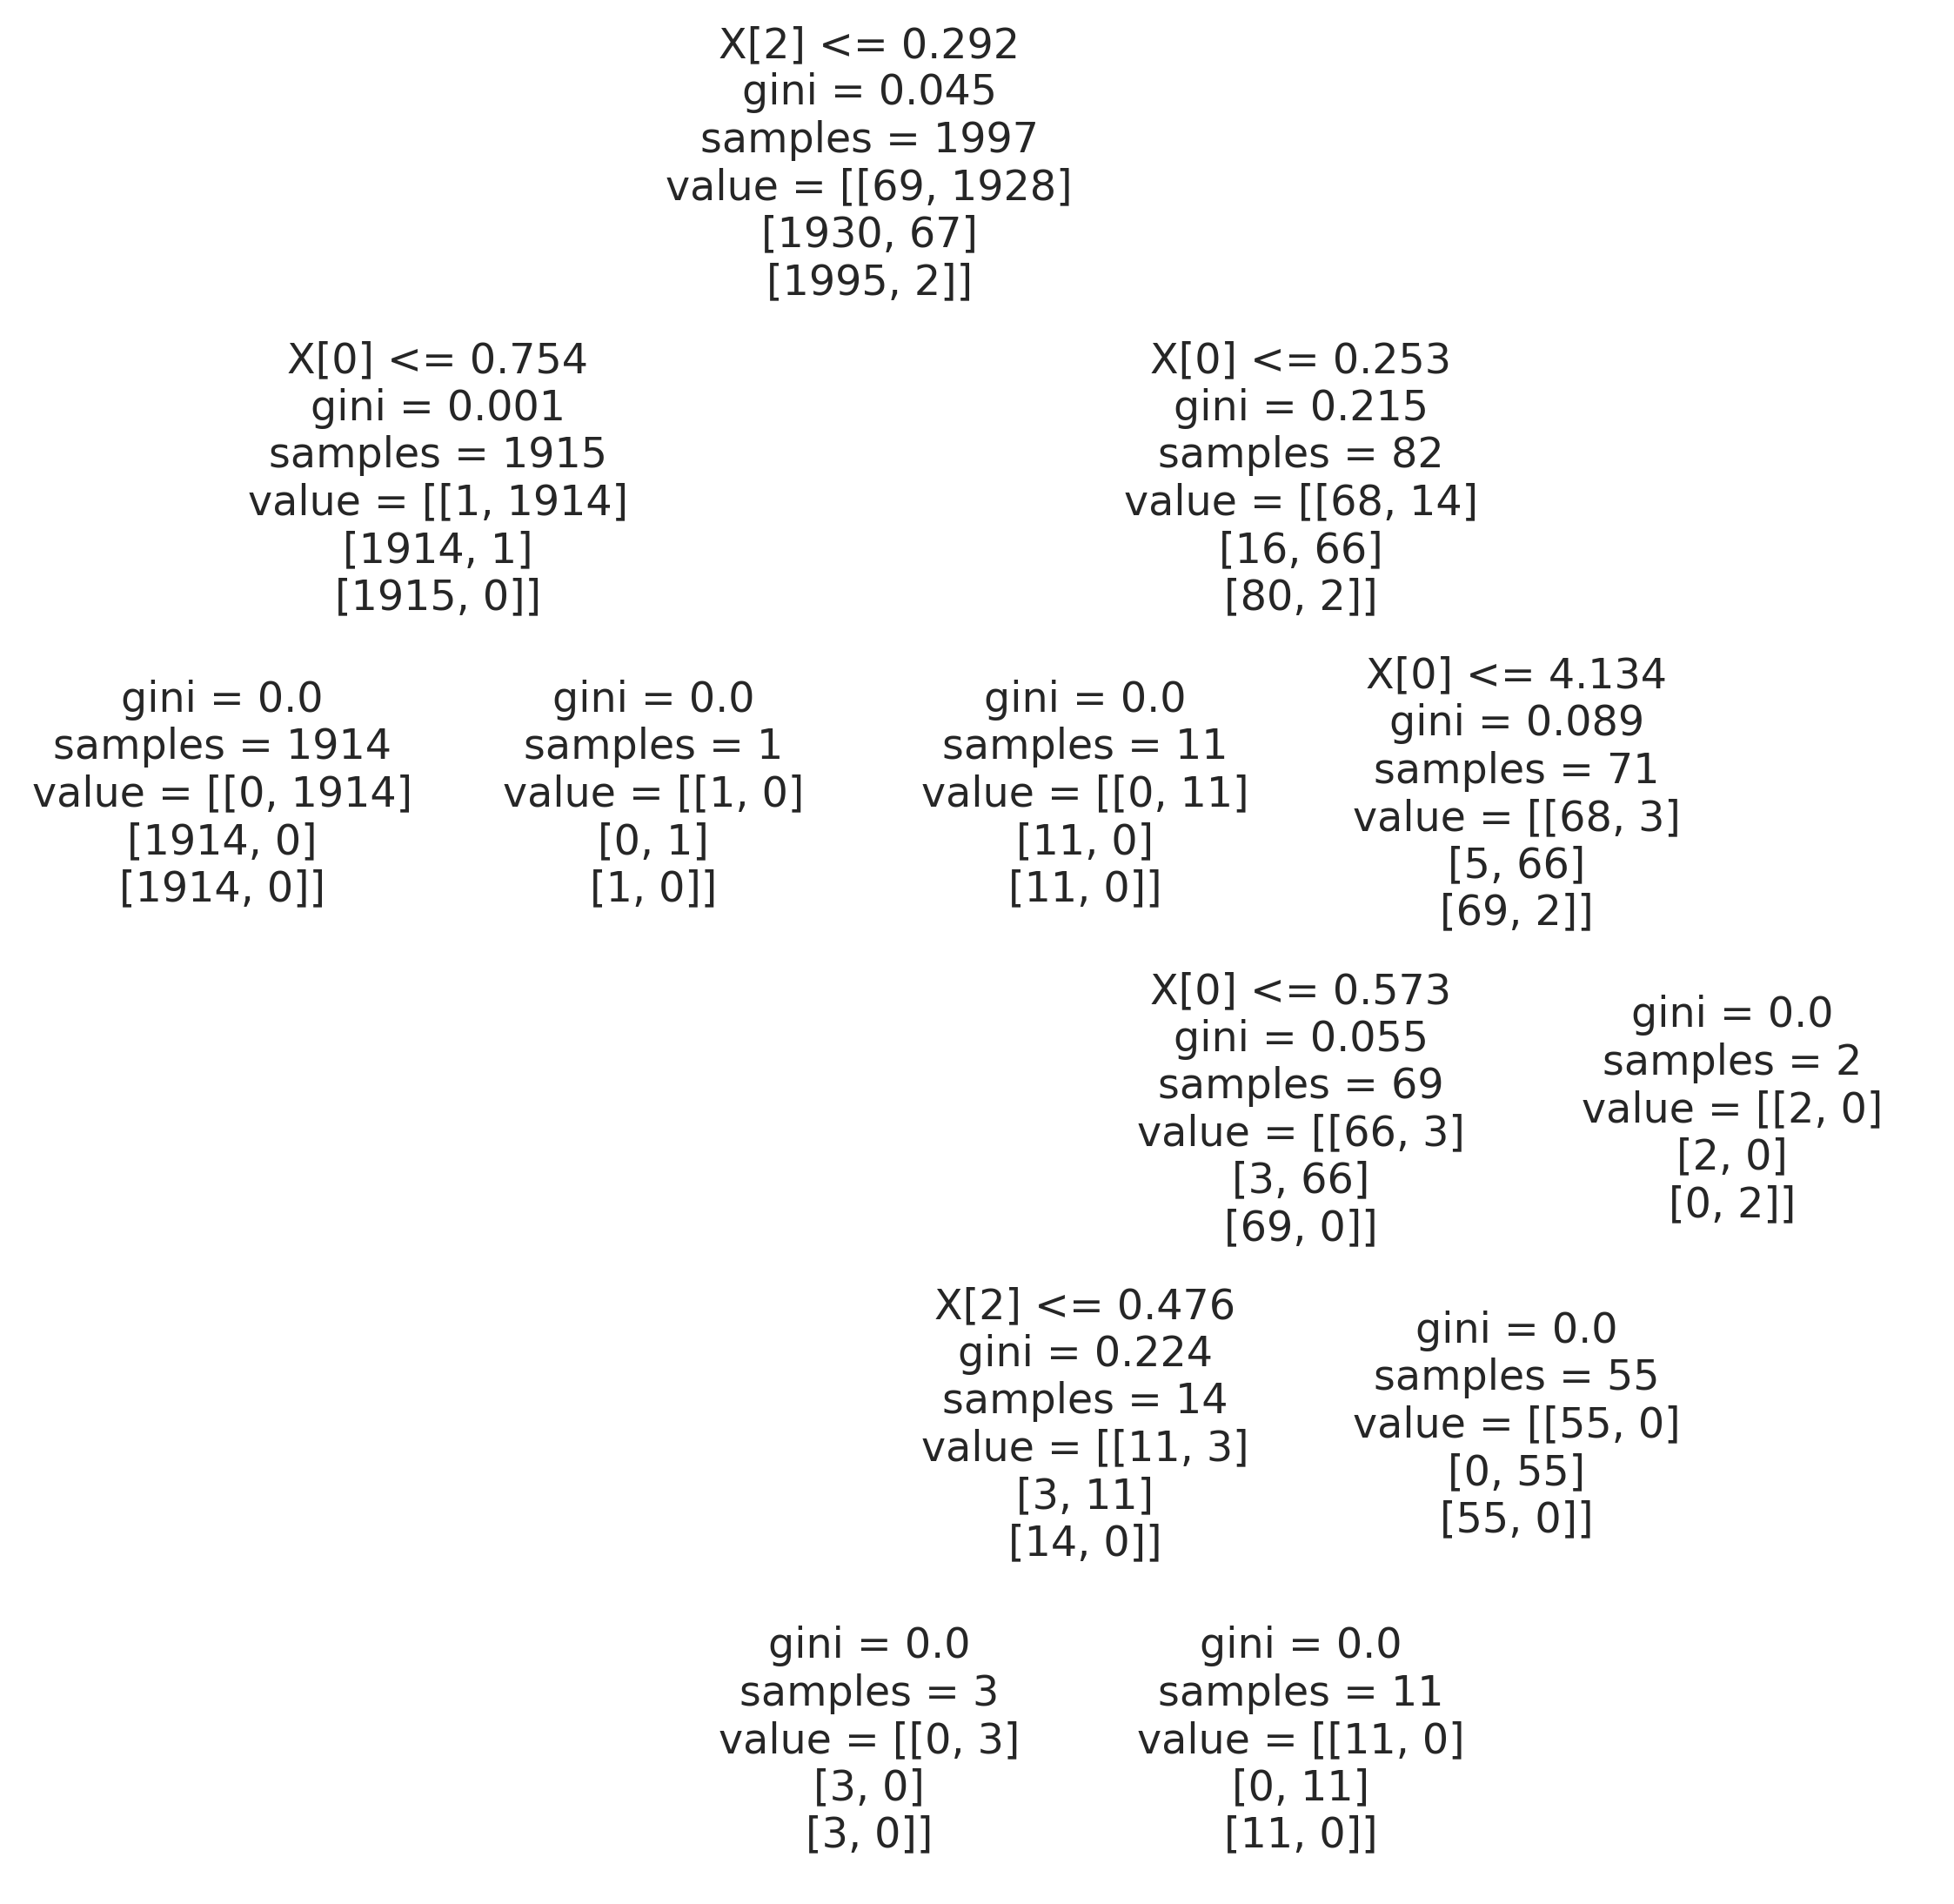

In [140]:
from sklearn import tree
plt.rcParams["figure.figsize"]=40,40
clf = tree.DecisionTreeClassifier()
clf = clf.fit(new_dataset1.loc[:,"IQ_AR":"IQ_TOTAL_ASSETS"],pd.get_dummies(new_dataset1.loc[:,"centroids"]) )
tree.plot_tree(clf) 

In [141]:
new_dataset1.head()

,company,year,IQ_EBIT,IQ_TOTAL_OPER_EXPEN,IQ_TOTAL_REV,IQ_OPER_INC,IQ_AR,IQ_RE,IQ_TOTAL_ASSETS,centroids
0,IQ1004737,2014.0,-0.082657,-0.105469,-0.102901,-0.082657,-0.043919,-0.091575,-0.101657,0
1,IQ100546355,2016.0,-0.112290,-0.152696,-0.147580,-0.112290,-0.165432,-0.082681,-0.130756,0
2,IQ100546355,2017.0,-0.133536,-0.141042,-0.141969,-0.133536,-0.166284,-0.093209,-0.130310,0
3,IQ100842126,2014.0,-0.122353,-0.152588,-0.149398,-0.122353,-0.166380,-0.106163,-0.157064,0
4,IQ100842126,2015.0,-0.104113,-0.132686,-0.129481,-0.104113,-0.151715,-0.105450,-0.149209,0


In [142]:
features =['IQ_AR','IQ_RE','IQ_TOTAL_ASSETS']